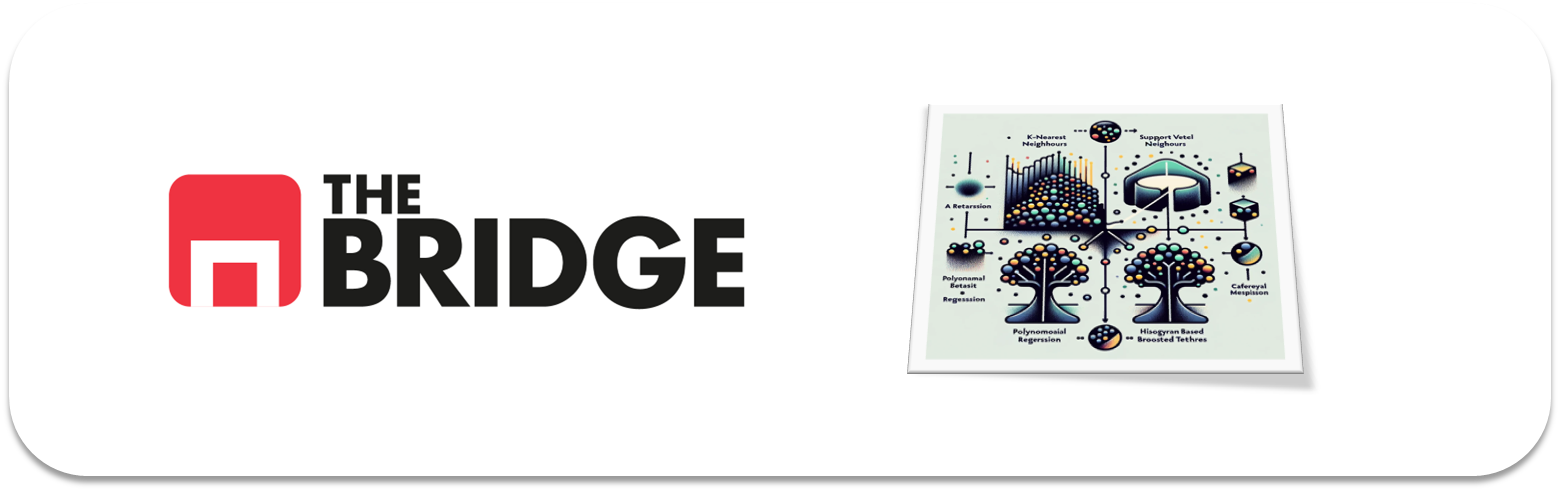

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Evitar los warning
import warnings
warnings.filterwarnings("ignore")

# Mejora características de impresión
from pprint import pprint

# Tratamiento de variables categóricas
from sklearn.preprocessing import OrdinalEncoder
pd.get_dummies # para one-hot encoding

# Tratamiento variables numéricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Separación df
from sklearn.model_selection import train_test_split

# Evaluación regresión lineal
from sklearn import linear_model, metrics, model_selection
from sklearn.model_selection import cross_val_score

# Regularización
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Evaluación regresión logística
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import precision_score,recall_score


# Entrenamiento modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

# Hacer 'x' subconjuntos de 'y' elementos
from sklearn.model_selection import StratifiedShuffleSplit

# Acumular los resultados de la evaluación 'accuracy' en una lista
from sklearn.metrics import accuracy_score
# Representar el árbol de forma visual
from sklearn.tree import plot_tree

# Optimización hiperparámetros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Ensamblados
from sklearn.ensemble import RandomForestClassifier # Clasificación
from sklearn.ensemble import RandomForestRegressor # Regresión
from sklearn.ensemble import AdaBoostClassifier # Clasificación
from sklearn.ensemble import AdaBoostRegressor # Regresión
from sklearn.ensemble import GradientBoostingRegressor # Regresión
from sklearn.ensemble import GradientBoostingClassifier # Clasificación
from xgboost import XGBRFRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor, Pool
from catboost import CatBoostClassifier

# Otros modelos supervisados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC # "support vector classifier"
from sklearn.svm import SVR # "support vector regressor"

# Para diferentes gráficos
from sklearn.pipeline import make_pipeline 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# Obtener todas las métrica que acepta "scoring"
from sklearn.metrics import get_scorer_names # y se pone get_scorer_names()


# Equilibrado de clases
from imblearn.over_sampling import SMOTE # Nuevos amigos para ayudaros
from imblearn.under_sampling import RandomUnderSampler # Nuevos amigos para ayudarnos
from sklearn.utils import resample


from scipy.stats import shapiro, skew, kurtosis, chi2_contingency, ttest_ind, f_oneway, pointbiserialr, pearsonr, spearmanr, kendalltau
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats



## Funciones

In [2]:
from toolbox_ML import *
from toolbox_DS import *
from EDA_function_tools import *



# #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

## Carga datos y primera revisión

In [3]:
df = pd.read_csv("./data/wines_dataset.csv", sep = "|")
df.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.210,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.160,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.180,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.260,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.630,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
5,5.7,0.265,0.28,6.90,0.036,46.0,150.0,0.99299,3.36,0.44,10.8,7,white
6,6.6,0.210,0.31,11.40,0.039,46.0,165.0,0.99795,3.41,0.44,9.8,7,white
7,6.7,0.310,0.30,2.10,0.038,18.0,130.0,0.99280,3.36,0.63,10.6,6,white


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
describe_df(df).T

,DATE_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
fixed acidity,float64,0.0,106,1.63
volatile acidity,float64,0.0,187,2.88
citric acid,float64,0.0,89,1.37
residual sugar,float64,0.0,316,4.86
chlorides,float64,0.0,214,3.29
free sulfur dioxide,float64,0.0,135,2.08
total sulfur dioxide,float64,0.0,276,4.25
density,float64,0.0,998,15.36
pH,float64,0.0,108,1.66
sulphates,float64,0.0,111,1.71


In [6]:
tipifica_variables(df,10,30)

,nombre_variable,tipo_sugerido
0,fixed acidity,Numérica Discreta
1,volatile acidity,Numérica Discreta
2,citric acid,Numérica Discreta
3,residual sugar,Numérica Discreta
4,chlorides,Numérica Discreta
5,free sulfur dioxide,Numérica Discreta
6,total sulfur dioxide,Numérica Discreta
7,density,Numérica Discreta
8,pH,Numérica Discreta
9,sulphates,Numérica Discreta


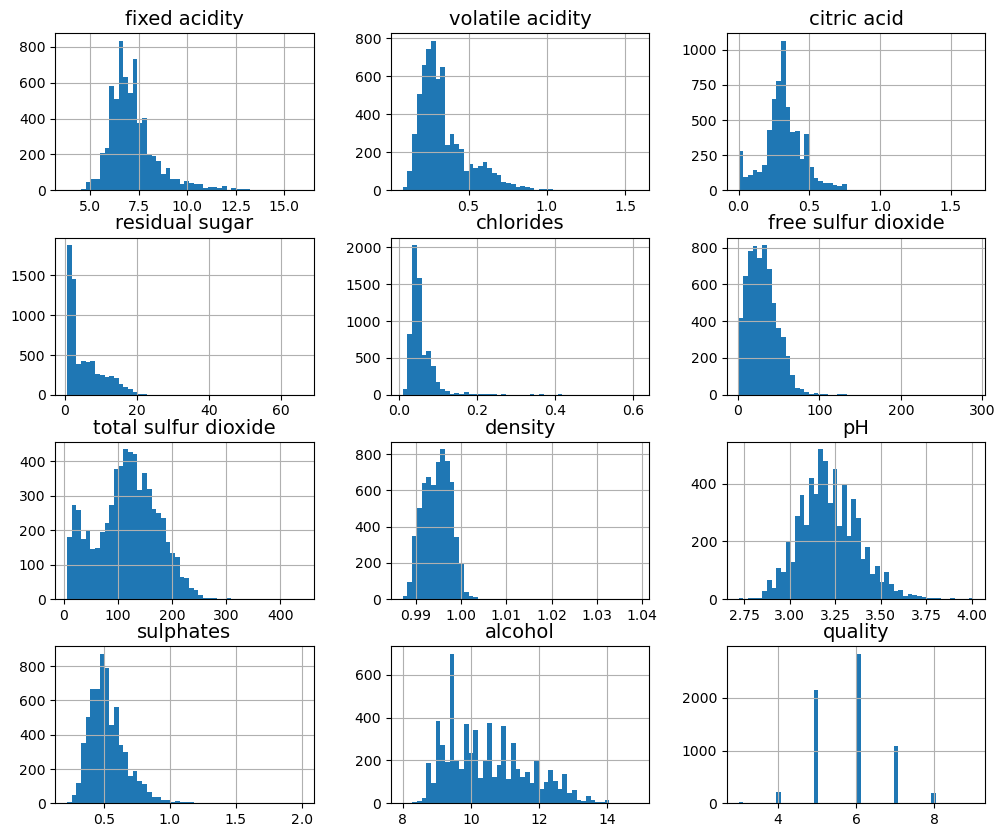

In [7]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 10)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset

plt.show()

In [8]:
df['quality'].value_counts(normalize=True).round(3)

quality
6    0.437
5    0.329
7    0.166
4    0.033
8    0.030
3    0.005
9    0.001
Name: proportion, dtype: float64

In [9]:
# Cambiamos la varaible quality a categórica
df['quality'] = df['quality'].astype('category')

In [10]:
df['class'].value_counts(normalize=True).round(3)

class
white    0.754
red      0.246
Name: proportion, dtype: float64

In [11]:
df['alcohol'].value_counts(normalize=True).round(3)

alcohol
9.500000     0.056
9.400000     0.051
9.200000     0.042
10.000000    0.035
10.500000    0.035
             ...  
11.550000    0.000
12.333333    0.000
10.566667    0.000
10.750000    0.000
11.433333    0.000
Name: proportion, Length: 111, dtype: float64

## Target

- Para clasificación la target es 'quality'
- Para regresión la target es 'alcohol'

## Limpieza datos

In [12]:
df.duplicated().sum()

1177

Hay duplicados!!!!

In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

No hay nulos

In [16]:
# Reviso como quedaría tras la eliminación de los duplicados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5320 non-null   float64 
 1   volatile acidity      5320 non-null   float64 
 2   citric acid           5320 non-null   float64 
 3   residual sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free sulfur dioxide   5320 non-null   float64 
 6   total sulfur dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  quality               5320 non-null   category
 12  class                 5320 non-null   object  
dtypes: category(1), float64(11), object(1)
memory usage: 545.9+ KB


## Separación train/ test 

In [17]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)
print(len(train_set))
print(len(test_set))

4256
1064


## Mini EDA

In [18]:
features_num = train_set.select_dtypes(['int','float']).columns.tolist()
features_cat = train_set.select_dtypes(['category','object']).columns.tolist()

### Univariables

In [19]:
train_set.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4256.0,7.21,1.30,3.80,6.40,7.00,7.70,15.90
volatile acidity,4256.0,0.34,0.17,0.08,0.23,0.30,0.41,1.58
citric acid,4256.0,0.32,0.15,0.00,0.24,0.31,0.40,1.66
residual sugar,4256.0,5.07,4.56,0.60,1.80,2.70,7.50,65.80
chlorides,4256.0,0.06,0.04,0.01,0.04,0.05,0.07,0.61
free sulfur dioxide,4256.0,30.06,17.72,1.00,17.00,28.00,41.00,289.00
total sulfur dioxide,4256.0,114.52,56.49,6.00,76.00,117.00,153.00,440.00
density,4256.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,4256.0,3.22,0.16,2.72,3.11,3.22,3.33,4.01
sulphates,4256.0,0.53,0.15,0.23,0.43,0.51,0.60,2.00


Para fixed acidity
*************************


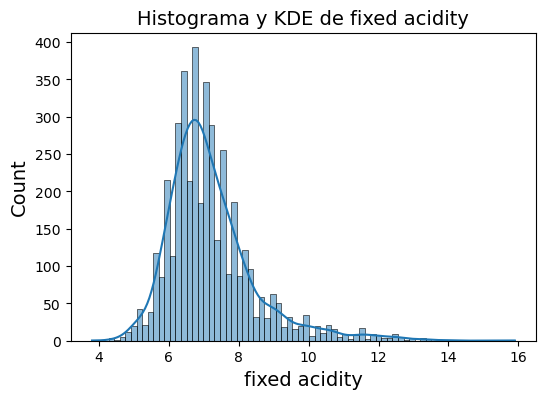

count    4256.00
mean        7.21
std         1.30
min         3.80
25%         6.40
50%         7.00
75%         7.70
max        15.90
Name: fixed acidity, dtype: float64

La moda es 6.80, el coeficiente de variación es 18.01% y el IQR es 1.30

Prueba Shapiro-Wilk: p-value=0.000. No tiene distribución normal

Asimetría: 1.65, valores extendidos a la derecha

Curtosis: 4.51. Riesgo de valores atípicos

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 56 y suponen en proporción 1.32%

Para volatile acidity
*************************


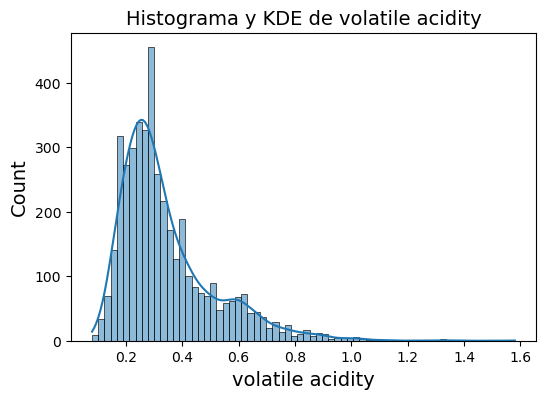

count    4256.00
mean        0.34
std         0.17
min         0.08
25%         0.23
50%         0.30
75%         0.41
max         1.58
Name: volatile acidity, dtype: float64

La moda es 0.28, el coeficiente de variación es 48.76% y el IQR es 0.18

Prueba Shapiro-Wilk: p-value=0.000. No tiene distribución normal

Asimetría: 1.53, valores extendidos a la derecha

Curtosis: 3.06. Riesgo de valores atípicos

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 27 y suponen en proporción 0.63%

Para citric acid
*************************


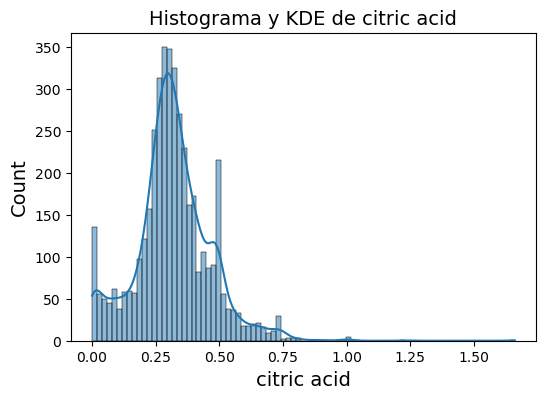

count    4256.00
mean        0.32
std         0.15
min         0.00
25%         0.24
50%         0.31
75%         0.40
max         1.66
Name: citric acid, dtype: float64

La moda es 0.30, el coeficiente de variación es 46.41% y el IQR es 0.16

Prueba Shapiro-Wilk: p-value=0.000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: 2.86. Poco riesgo de valores atípicos

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 8 y suponen en proporción 0.19%

Para residual sugar
*************************


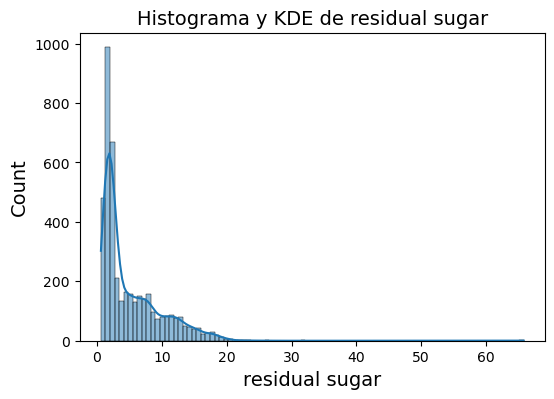

count    4256.00
mean        5.07
std         4.56
min         0.60
25%         1.80
50%         2.70
75%         7.50
max        65.80
Name: residual sugar, dtype: float64

La moda es 1.60, el coeficiente de variación es 89.83% y el IQR es 5.70

Prueba Shapiro-Wilk: p-value=0.000. No tiene distribución normal

Asimetría: 1.79, valores extendidos a la derecha

Curtosis: 8.17. Riesgo de valores atípicos

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 3 y suponen en proporción 0.07%

Para chlorides
*************************


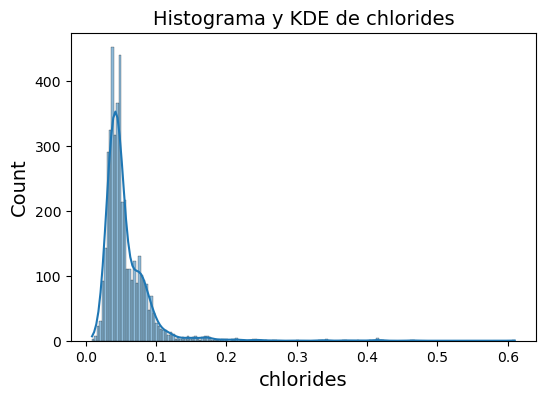

count    4256.00
mean        0.06
std         0.04
min         0.01
25%         0.04
50%         0.05
75%         0.07
max         0.61
Name: chlorides, dtype: float64

La moda es 0.05, el coeficiente de variación es 63.17% y el IQR es 0.03

Prueba Shapiro-Wilk: p-value=0.000. No tiene distribución normal

Asimetría: 5.16, valores extendidos a la derecha

Curtosis: 45.89. Riesgo de valores atípicos

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 89 y suponen en proporción 2.09%

Para free sulfur dioxide
*************************


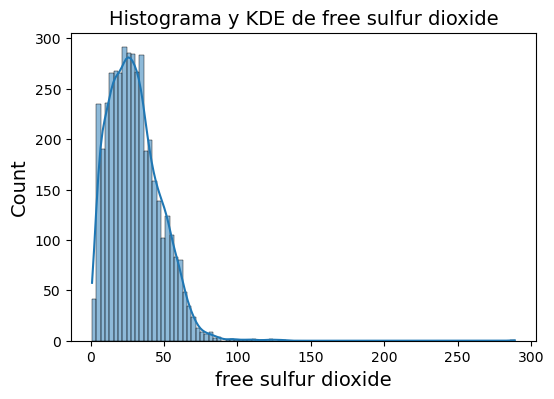

count    4256.00
mean       30.06
std        17.72
min         1.00
25%        17.00
50%        28.00
75%        41.00
max       289.00
Name: free sulfur dioxide, dtype: float64

La moda es 29.00, el coeficiente de variación es 58.95% y el IQR es 24.00

Prueba Shapiro-Wilk: p-value=0.000. No tiene distribución normal

Asimetría: 1.46, valores extendidos a la derecha

Curtosis: 11.42. Riesgo de valores atípicos

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 6 y suponen en proporción 0.14%

Para total sulfur dioxide
*************************


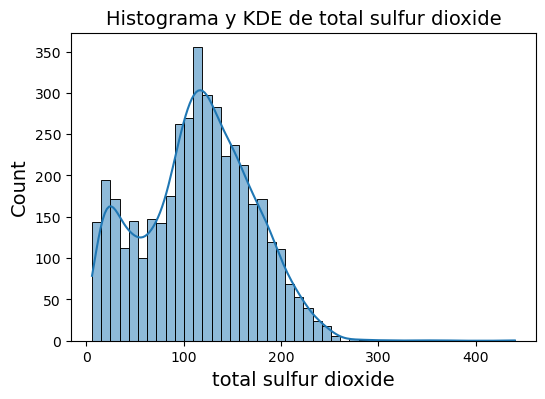

count    4256.00
mean      114.52
std        56.49
min         6.00
25%        76.00
50%       117.00
75%       153.00
max       440.00
Name: total sulfur dioxide, dtype: float64

La moda es 111.00, el coeficiente de variación es 49.32% y el IQR es 77.00

Prueba Shapiro-Wilk: p-value=0.000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.25. Poco riesgo de valores atípicos

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 1 y suponen en proporción 0.02%

Para density
*************************


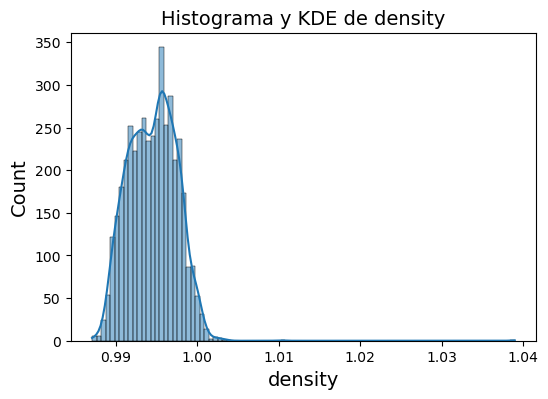

count    4256.00
mean        0.99
std         0.00
min         0.99
25%         0.99
50%         0.99
75%         1.00
max         1.04
Name: density, dtype: float64

La moda es 0.99, el coeficiente de variación es 0.30% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.000. No tiene distribución normal

Asimetría: 0.82, valores extendidos a la derecha

Curtosis: 11.09. Riesgo de valores atípicos

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 2 y suponen en proporción 0.05%

Para pH
*************************


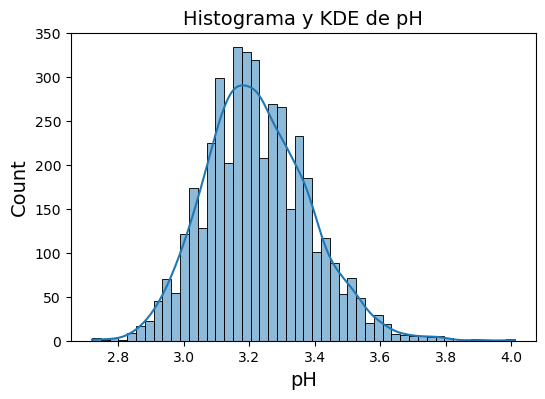

count    4256.00
mean        3.22
std         0.16
min         2.72
25%         3.11
50%         3.22
75%         3.33
max         4.01
Name: pH, dtype: float64

La moda es 3.22, el coeficiente de variación es 4.93% y el IQR es 0.22

Prueba Shapiro-Wilk: p-value=0.000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: 0.48. Poco riesgo de valores atípicos

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 2 y suponen en proporción 0.05%

Para sulphates
*************************


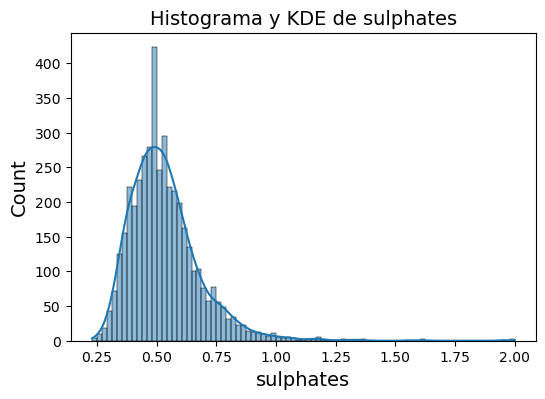

count    4256.00
mean        0.53
std         0.15
min         0.23
25%         0.43
50%         0.51
75%         0.60
max         2.00
Name: sulphates, dtype: float64

La moda es 0.50, el coeficiente de variación es 28.23% y el IQR es 0.17

Prueba Shapiro-Wilk: p-value=0.000. No tiene distribución normal

Asimetría: 1.89, valores extendidos a la derecha

Curtosis: 9.38. Riesgo de valores atípicos

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 26 y suponen en proporción 0.61%

Para alcohol
*************************


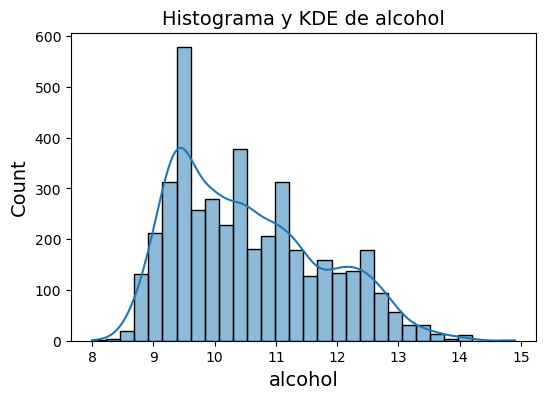

count    4256.00
mean       10.54
std         1.19
min         8.00
25%         9.50
50%        10.40
75%        11.40
max        14.90
Name: alcohol, dtype: float64

La moda es 9.50, el coeficiente de variación es 11.27% y el IQR es 1.90

Prueba Shapiro-Wilk: p-value=0.000. No tiene distribución normal

Asimetría: 0.57, valores extendidos a la derecha

Curtosis: -0.54. Poco riesgo de valores atípicos

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%



,Shapiro,Asimetría,Curtosis,Outliers_inf_pro,Outliers_sup_pro
fixed acidity,0.0,1.65,4.51,0.0,1.32
volatile acidity,0.0,1.53,3.06,0.0,0.63
citric acid,0.0,0.50,2.86,0.0,0.19
residual sugar,0.0,1.79,8.17,0.0,0.07
chlorides,0.0,5.16,45.89,0.0,2.09
free sulfur dioxide,0.0,1.46,11.42,0.0,0.14
total sulfur dioxide,0.0,0.05,-0.25,0.0,0.02
density,0.0,0.82,11.09,0.0,0.05
pH,0.0,0.40,0.48,0.0,0.05
sulphates,0.0,1.89,9.38,0.0,0.61


In [20]:
analisis_univariable_numericas(train_set,features_num)

Para quality
*************************


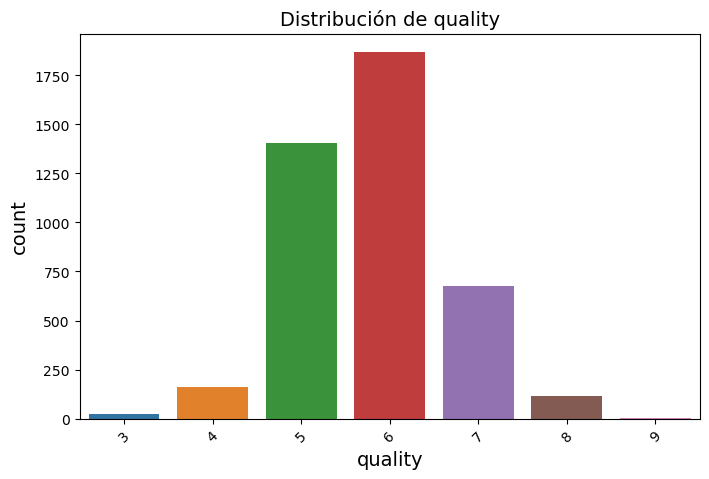

Frecuencia de categorías en quality:
quality
6    1870
5    1407
7     677
4     162
8     114
3      22
9       4
Name: count, dtype: int64

Porcentaje de categorías en quality:
quality
6    43.94
5    33.06
7    15.91
4     3.81
8     2.68
3     0.52
9     0.09
Name: proportion, dtype: float64

La moda es 6 con una frecuencia de 1870
Proporción de la moda: 43.94%

Para class
*************************


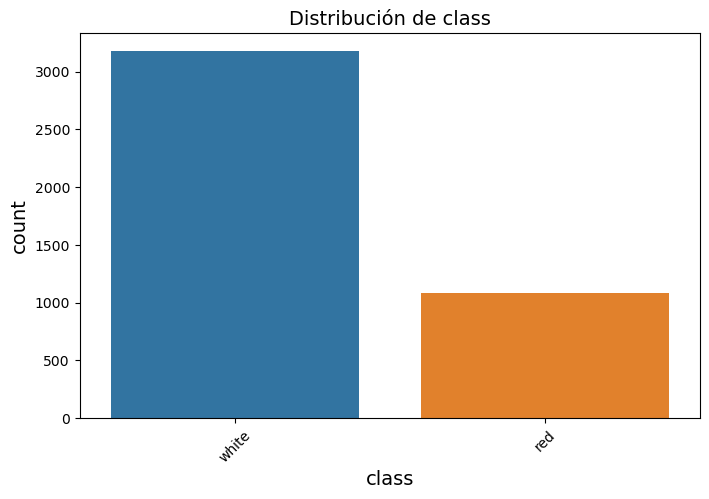

Frecuencia de categorías en class:
class
white    3176
red      1080
Name: count, dtype: int64

Porcentaje de categorías en class:
class
white    74.62
red      25.38
Name: proportion, dtype: float64

La moda es white con una frecuencia de 3176
Proporción de la moda: 74.62%



In [21]:
analisis_univariable_categoricas(train_set,features_cat)

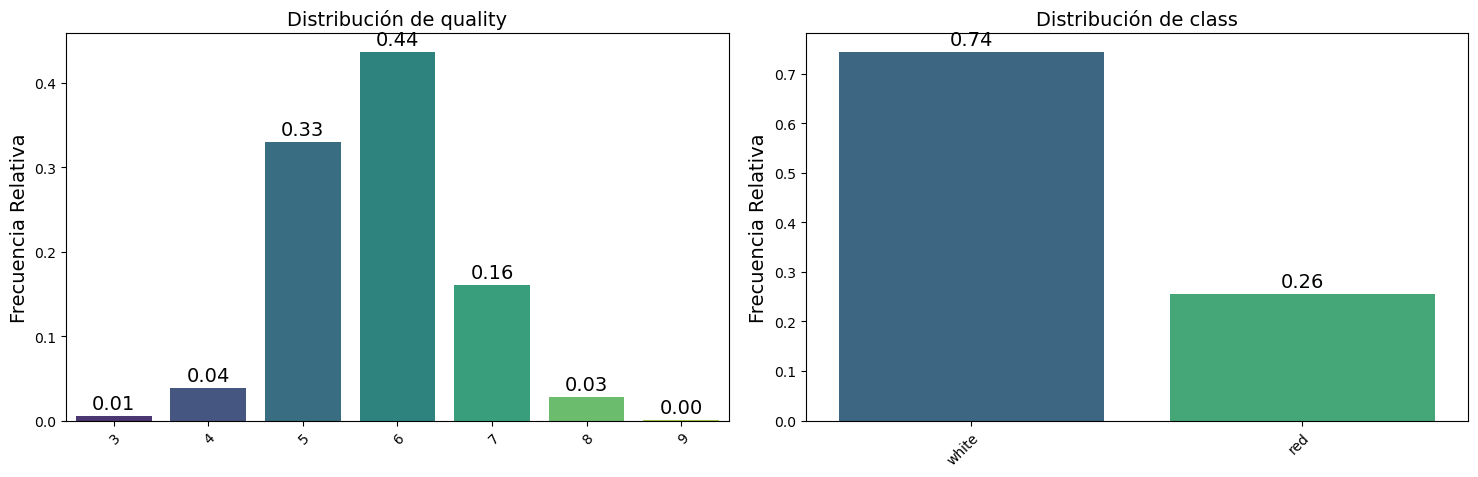

In [22]:
pinta_distribucion_categoricas_cgpt1(df,features_cat, relativa=True, mostrar_valores=True)

### Bivariable clasificación
Target = 'quality'

Análisis de fixed acidity vs quality
****************************************


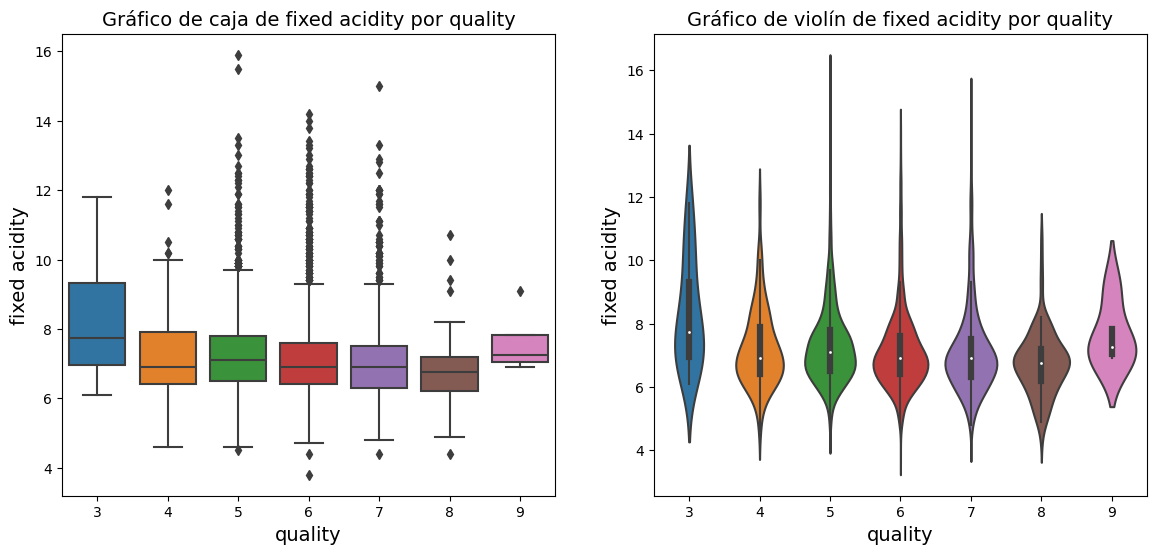

Estadísticos de resumen para fixed acidity por quality:
          count  mean   std  min   25%   50%   75%   max
quality                                                 
3          22.0  8.30  1.70  6.1  6.95  7.75  9.32  11.8
4         162.0  7.22  1.23  4.6  6.40  6.90  7.90  12.0
5        1407.0  7.32  1.26  4.5  6.50  7.10  7.80  15.9
6        1870.0  7.16  1.29  3.8  6.40  6.90  7.60  14.2
7         677.0  7.14  1.39  4.4  6.30  6.90  7.50  15.0
8         114.0  6.75  1.01  4.4  6.20  6.75  7.20  10.7
9           4.0  7.62  1.00  6.9  7.05  7.25  7.82   9.1

ANOVA para fixed acidity:
Estadístico F: 7.71
p-valor: 0.000
La variable fixed acidity está significativamente asociada con quality (p < 0.05). Podría ser útil para el modelo.

Análisis de volatile acidity vs quality
****************************************


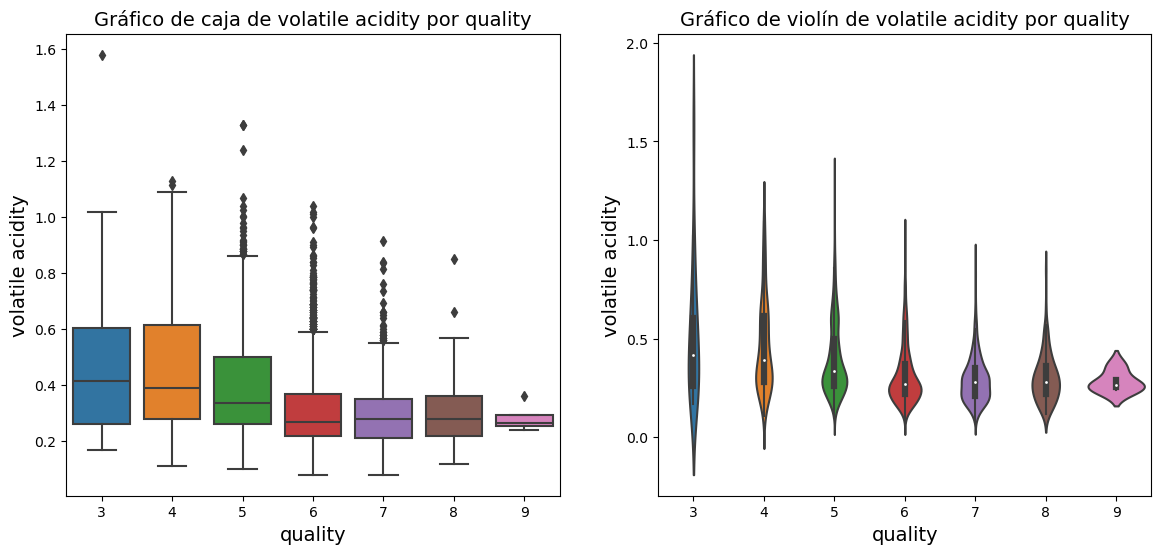

Estadísticos de resumen para volatile acidity por quality:
          count  mean   std   min   25%   50%   75%   max
quality                                                  
3          22.0  0.51  0.33  0.17  0.26  0.42  0.60  1.58
4         162.0  0.47  0.23  0.11  0.28  0.39  0.61  1.13
5        1407.0  0.39  0.18  0.10  0.26  0.34  0.50  1.33
6        1870.0  0.31  0.15  0.08  0.22  0.27  0.37  1.04
7         677.0  0.29  0.12  0.08  0.21  0.28  0.35  0.92
8         114.0  0.30  0.12  0.12  0.22  0.28  0.36  0.85
9           4.0  0.28  0.05  0.24  0.26  0.26  0.29  0.36

ANOVA para volatile acidity:
Estadístico F: 65.37
p-valor: 0.000
La variable volatile acidity está significativamente asociada con quality (p < 0.05). Podría ser útil para el modelo.

Análisis de citric acid vs quality
****************************************


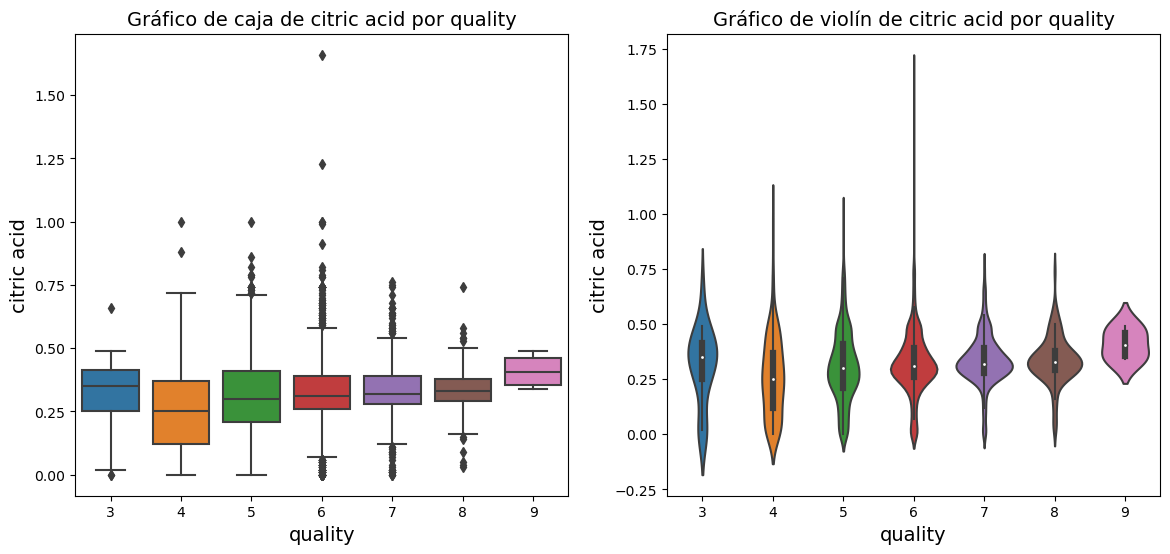

Estadísticos de resumen para citric acid por quality:
          count  mean   std   min   25%   50%   75%   max
quality                                                  
3          22.0  0.31  0.17  0.00  0.25  0.35  0.42  0.66
4         162.0  0.26  0.18  0.00  0.12  0.25  0.37  1.00
5        1407.0  0.31  0.16  0.00  0.21  0.30  0.41  1.00
6        1870.0  0.32  0.14  0.00  0.26  0.31  0.39  1.66
7         677.0  0.34  0.11  0.00  0.28  0.32  0.39  0.76
8         114.0  0.34  0.11  0.03  0.29  0.33  0.38  0.74
9           4.0  0.41  0.07  0.34  0.36  0.40  0.46  0.49

ANOVA para citric acid:
Estadístico F: 7.81
p-valor: 0.000
La variable citric acid está significativamente asociada con quality (p < 0.05). Podría ser útil para el modelo.

Análisis de residual sugar vs quality
****************************************


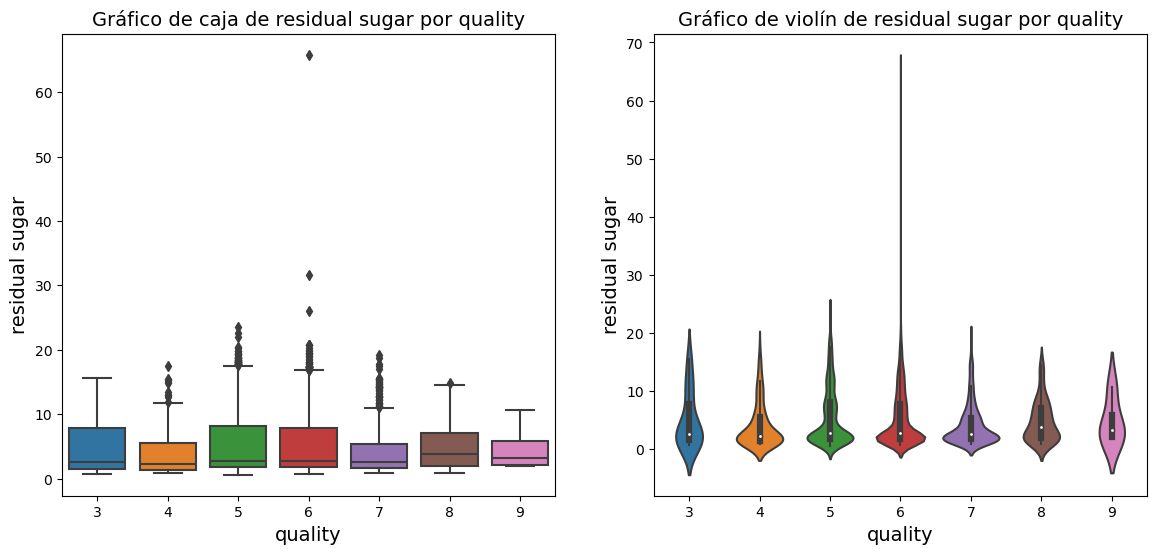

Estadísticos de resumen para residual sugar por quality:
          count  mean   std  min   25%   50%   75%    max
quality                                                  
3          22.0  4.99  4.75  0.7  1.51  2.55  7.80  15.55
4         162.0  4.05  3.80  0.8  1.40  2.20  5.57  17.55
5        1407.0  5.50  4.84  0.6  1.80  2.80  8.10  23.50
6        1870.0  5.18  4.72  0.7  1.80  2.80  7.80  65.80
7         677.0  4.18  3.53  0.9  1.70  2.60  5.40  19.25
8         114.0  4.81  3.56  0.8  1.90  3.88  7.04  14.80
9           4.0  4.75  4.02  2.0  2.15  3.20  5.80  10.60

ANOVA para residual sugar:
Estadístico F: 8.01
p-valor: 0.000
La variable residual sugar está significativamente asociada con quality (p < 0.05). Podría ser útil para el modelo.

Análisis de chlorides vs quality
****************************************


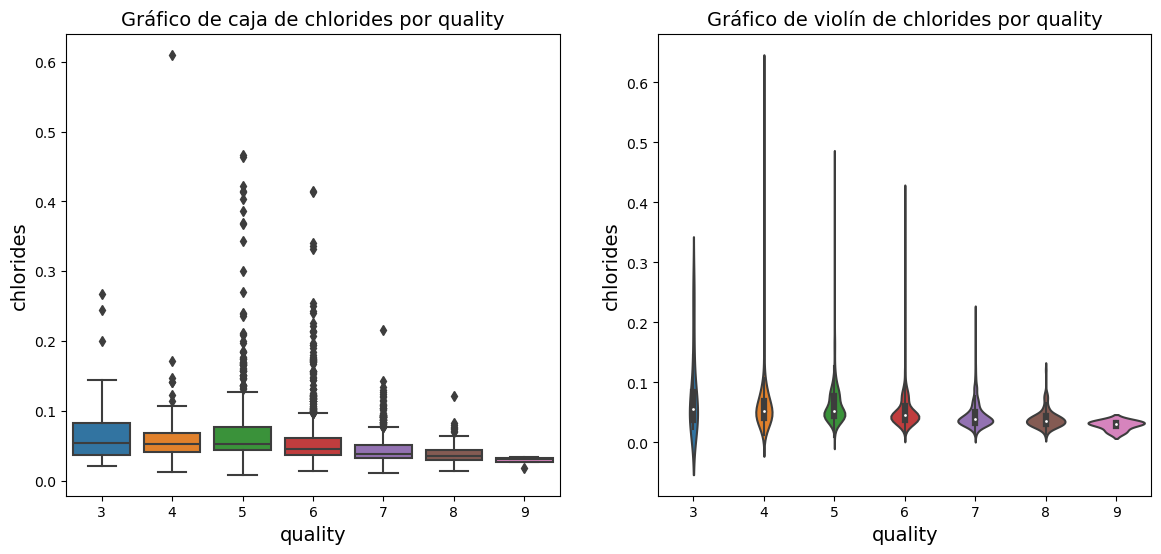

Estadísticos de resumen para chlorides por quality:
          count  mean   std   min   25%   50%   75%   max
quality                                                  
3          22.0  0.08  0.07  0.02  0.04  0.06  0.08  0.27
4         162.0  0.06  0.05  0.01  0.04  0.05  0.07  0.61
5        1407.0  0.07  0.04  0.01  0.04  0.05  0.08  0.47
6        1870.0  0.05  0.03  0.02  0.04  0.05  0.06  0.42
7         677.0  0.05  0.02  0.01  0.03  0.04  0.05  0.22
8         114.0  0.04  0.02  0.01  0.03  0.04  0.04  0.12
9           4.0  0.03  0.01  0.02  0.03  0.03  0.03  0.04

ANOVA para chlorides:
Estadístico F: 36.02
p-valor: 0.000
La variable chlorides está significativamente asociada con quality (p < 0.05). Podría ser útil para el modelo.

Análisis de free sulfur dioxide vs quality
****************************************


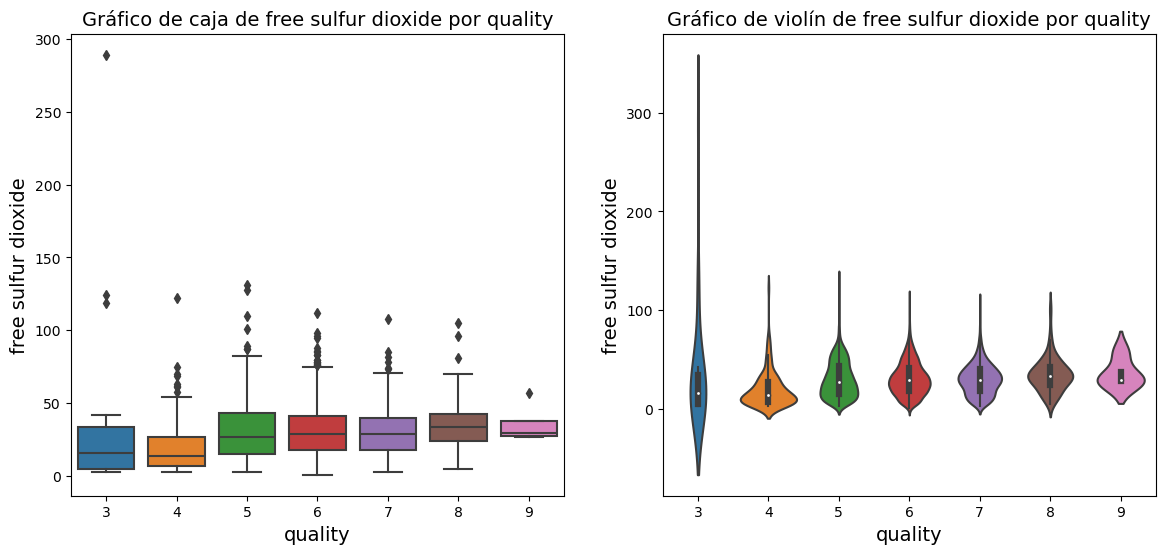

Estadísticos de resumen para free sulfur dioxide por quality:
          count   mean    std   min    25%   50%    75%    max
quality                                                       
3          22.0  38.68  64.89   3.0   5.25  16.0  34.00  289.0
4         162.0  19.48  17.53   3.0   7.00  14.0  26.75  122.5
5        1407.0  29.93  18.29   3.0  15.00  27.0  43.00  131.0
6        1870.0  30.77  16.55   1.0  18.00  29.0  41.00  112.0
7         677.0  29.86  15.36   3.0  18.00  29.0  40.00  108.0
8         114.0  34.51  17.08   5.0  24.00  33.5  42.75  105.0
9           4.0  35.75  14.27  27.0  27.75  29.5  37.50   57.0

ANOVA para free sulfur dioxide:
Estadístico F: 12.47
p-valor: 0.000
La variable free sulfur dioxide está significativamente asociada con quality (p < 0.05). Podría ser útil para el modelo.

Análisis de total sulfur dioxide vs quality
****************************************


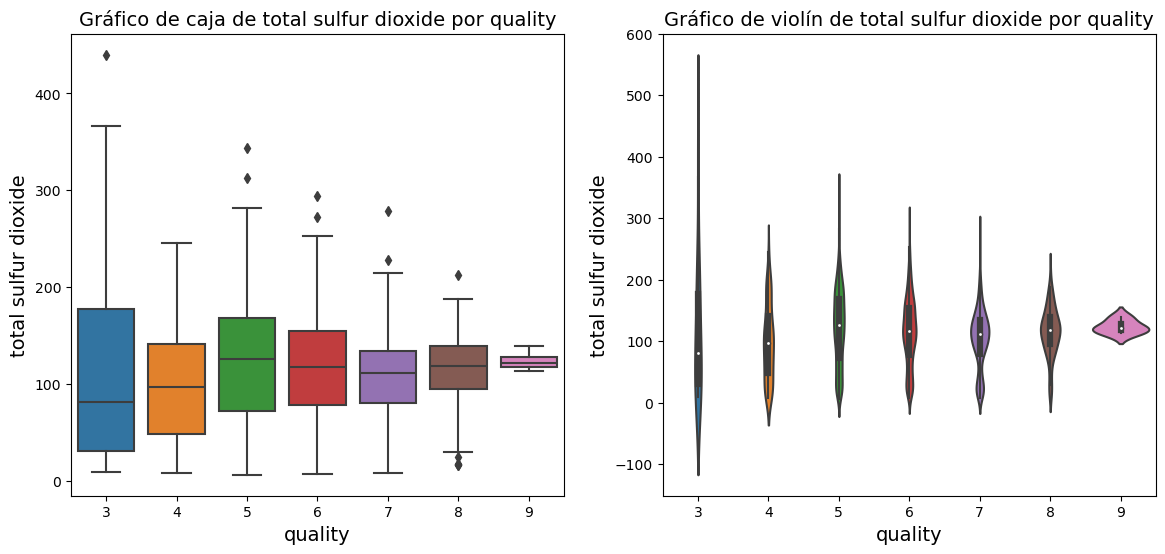

Estadísticos de resumen para total sulfur dioxide por quality:
          count    mean     std    min     25%    50%     75%    max
quality                                                             
3          22.0  118.84  117.05    9.0   30.00   81.0  177.00  440.0
4         162.0   98.22   61.26    8.0   47.75   96.5  141.25  245.0
5        1407.0  120.97   60.62    6.0   72.00  126.0  168.00  344.0
6        1870.0  114.90   55.09    7.0   78.00  117.0  154.00  294.0
7         677.0  103.59   46.90    8.0   80.00  111.0  134.00  278.0
8         114.0  115.70   39.41   16.0   95.00  118.5  139.50  212.5
9           4.0  123.75   11.12  113.0  117.50  121.5  127.75  139.0

ANOVA para total sulfur dioxide:
Estadístico F: 9.71
p-valor: 0.000
La variable total sulfur dioxide está significativamente asociada con quality (p < 0.05). Podría ser útil para el modelo.

Análisis de density vs quality
****************************************


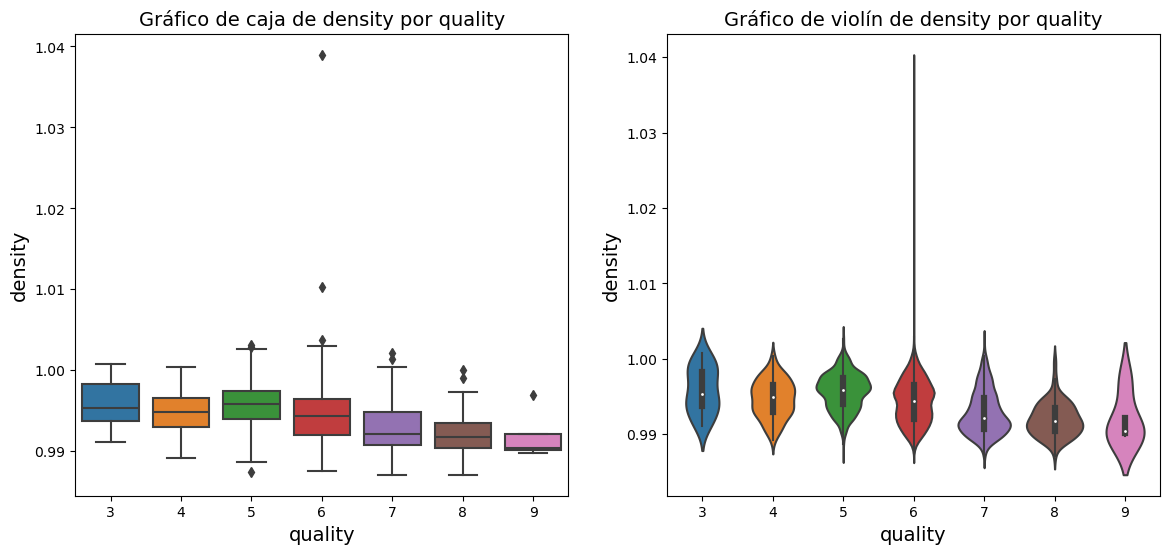

Estadísticos de resumen para density por quality:
          count  mean  std   min   25%   50%   75%   max
quality                                                 
3          22.0  1.00  0.0  0.99  0.99  1.00  1.00  1.00
4         162.0  0.99  0.0  0.99  0.99  0.99  1.00  1.00
5        1407.0  1.00  0.0  0.99  0.99  1.00  1.00  1.00
6        1870.0  0.99  0.0  0.99  0.99  0.99  1.00  1.04
7         677.0  0.99  0.0  0.99  0.99  0.99  0.99  1.00
8         114.0  0.99  0.0  0.99  0.99  0.99  0.99  1.00
9           4.0  0.99  0.0  0.99  0.99  0.99  0.99  1.00

ANOVA para density:
Estadístico F: 102.12
p-valor: 0.000
La variable density está significativamente asociada con quality (p < 0.05). Podría ser útil para el modelo.

Análisis de pH vs quality
****************************************


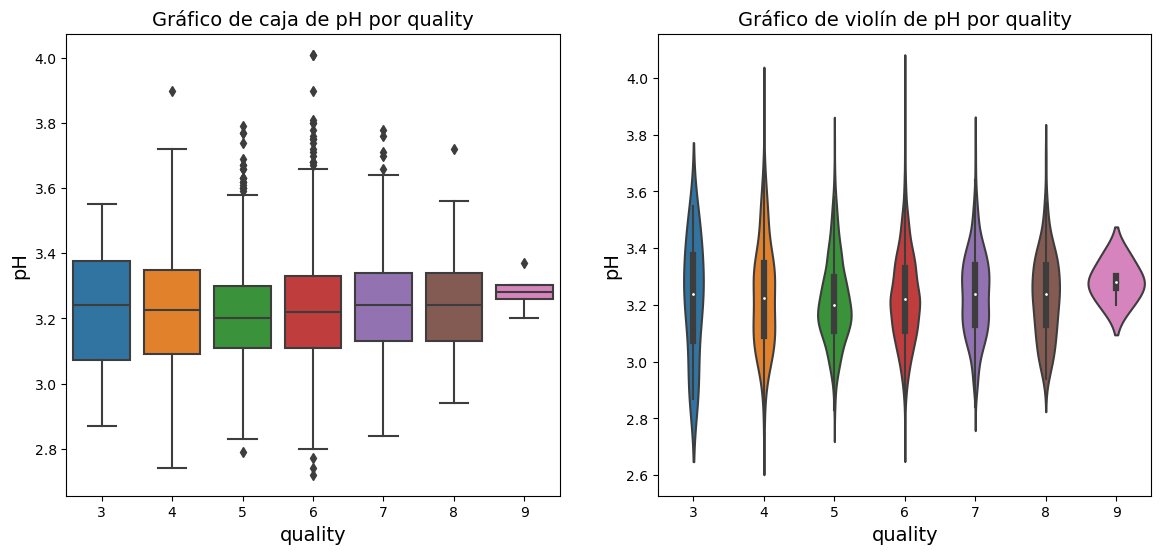

Estadísticos de resumen para pH por quality:
          count  mean   std   min   25%   50%   75%   max
quality                                                  
3          22.0  3.22  0.21  2.87  3.07  3.24  3.38  3.55
4         162.0  3.23  0.19  2.74  3.09  3.22  3.35  3.90
5        1407.0  3.22  0.15  2.79  3.11  3.20  3.30  3.79
6        1870.0  3.23  0.16  2.72  3.11  3.22  3.33  4.01
7         677.0  3.24  0.15  2.84  3.13  3.24  3.34  3.78
8         114.0  3.23  0.15  2.94  3.13  3.24  3.34  3.72
9           4.0  3.28  0.07  3.20  3.26  3.28  3.30  3.37

ANOVA para pH:
Estadístico F: 1.81
p-valor: 0.092
La variable pH no está significativamente asociada con quality (p >= 0.05).

Análisis de sulphates vs quality
****************************************


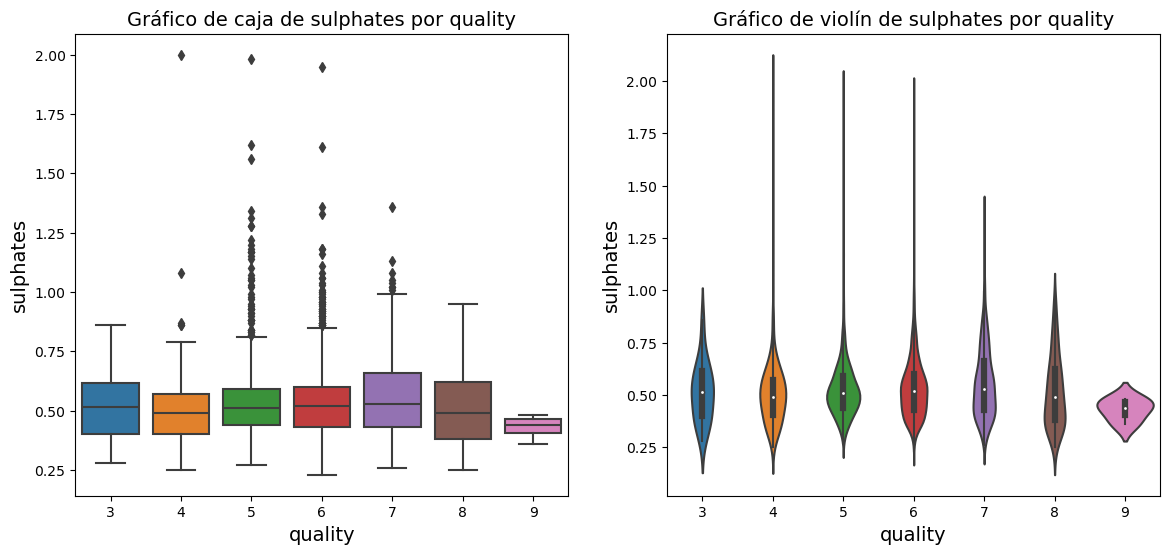

Estadísticos de resumen para sulphates por quality:
          count  mean   std   min   25%   50%   75%   max
quality                                                  
3          22.0  0.51  0.14  0.28  0.40  0.52  0.62  0.86
4         162.0  0.51  0.17  0.25  0.40  0.49  0.57  2.00
5        1407.0  0.53  0.15  0.27  0.44  0.51  0.59  1.98
6        1870.0  0.53  0.15  0.23  0.43  0.52  0.60  1.95
7         677.0  0.56  0.16  0.26  0.43  0.53  0.66  1.36
8         114.0  0.52  0.17  0.25  0.38  0.49  0.62  0.95
9           4.0  0.43  0.05  0.36  0.40  0.44  0.46  0.48

ANOVA para sulphates:
Estadístico F: 3.84
p-valor: 0.001
La variable sulphates está significativamente asociada con quality (p < 0.05). Podría ser útil para el modelo.

Análisis de alcohol vs quality
****************************************


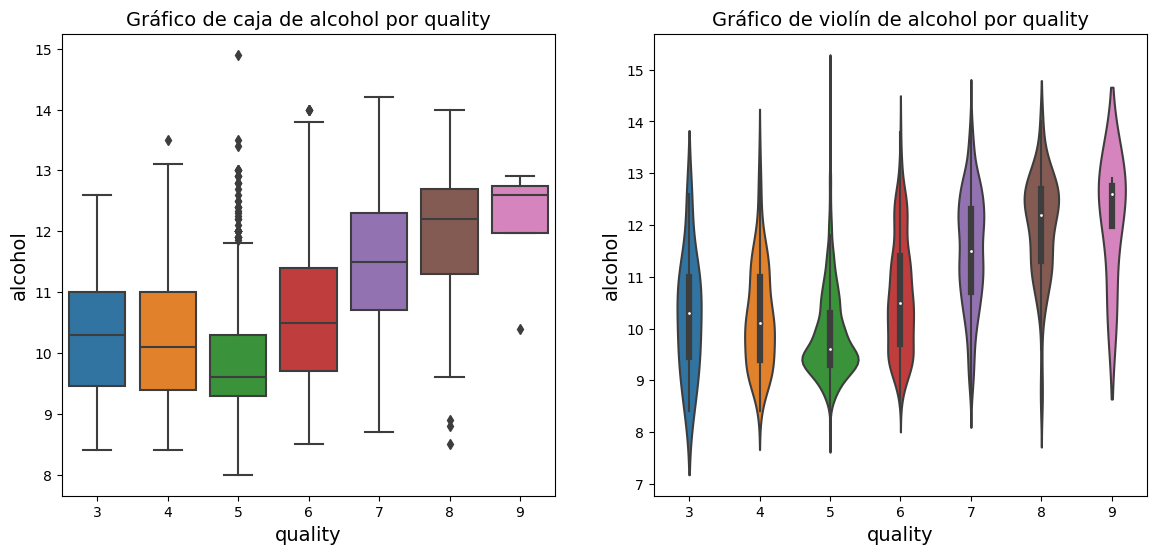

Estadísticos de resumen para alcohol por quality:
          count   mean   std   min    25%   50%    75%   max
quality                                                     
3          22.0  10.25  1.13   8.4   9.45  10.3  11.00  12.6
4         162.0  10.24  1.02   8.4   9.40  10.1  11.00  13.5
5        1407.0   9.87  0.83   8.0   9.30   9.6  10.30  14.9
6        1870.0  10.64  1.12   8.5   9.70  10.5  11.40  14.0
7         677.0  11.50  1.12   8.7  10.70  11.5  12.30  14.2
8         114.0  11.97  1.02   8.5  11.30  12.2  12.70  14.0
9           4.0  12.12  1.16  10.4  11.98  12.6  12.75  12.9

ANOVA para alcohol:
Estadístico F: 245.47
p-valor: 0.000
La variable alcohol está significativamente asociada con quality (p < 0.05). Podría ser útil para el modelo.



In [23]:
analisis_bivariable_numericas_categorica(train_set,'quality',features_num)

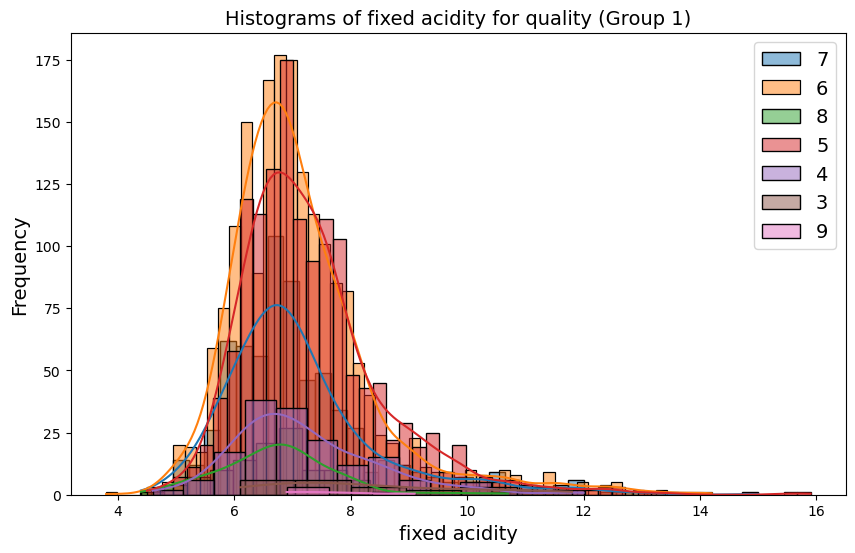

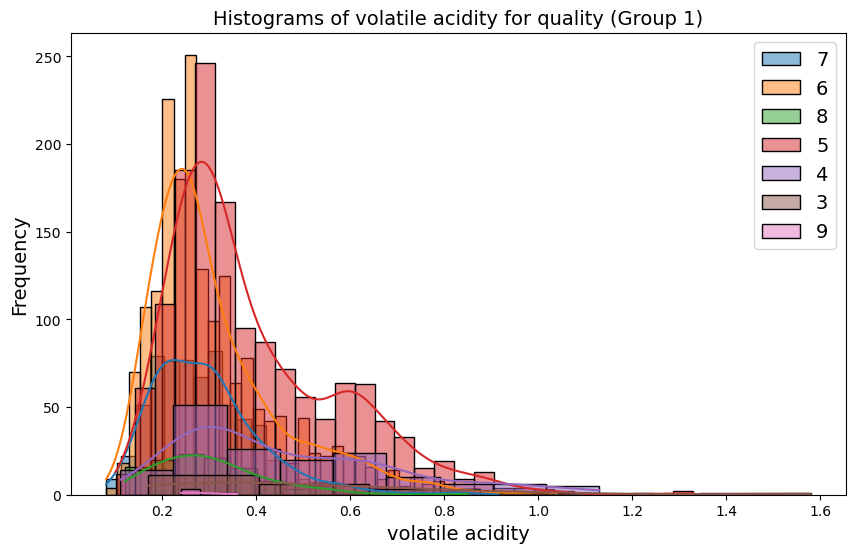

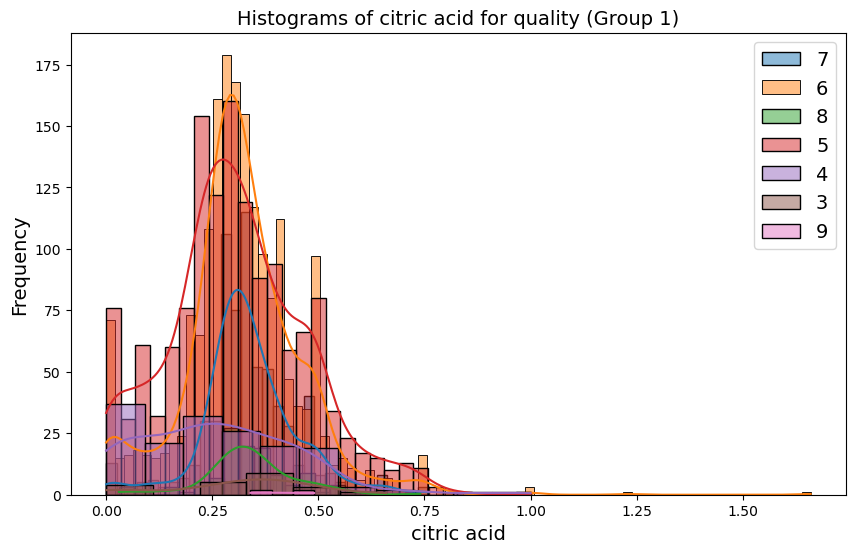

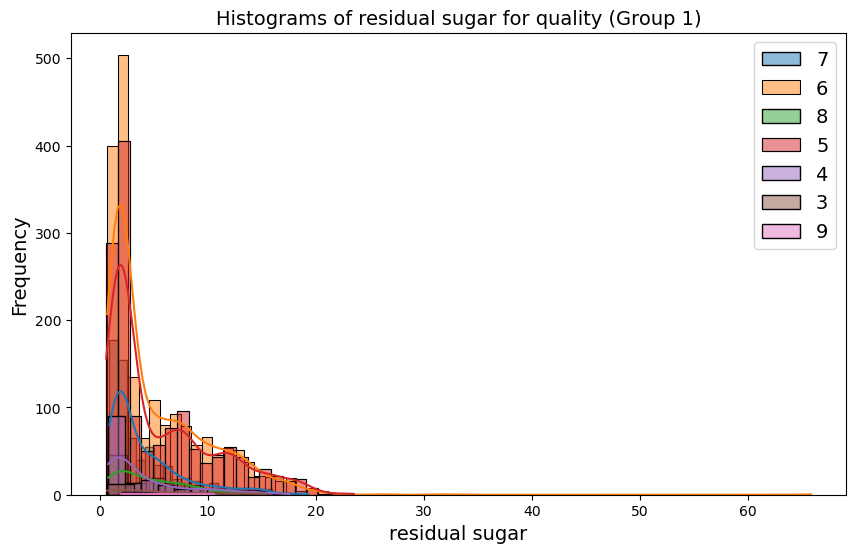

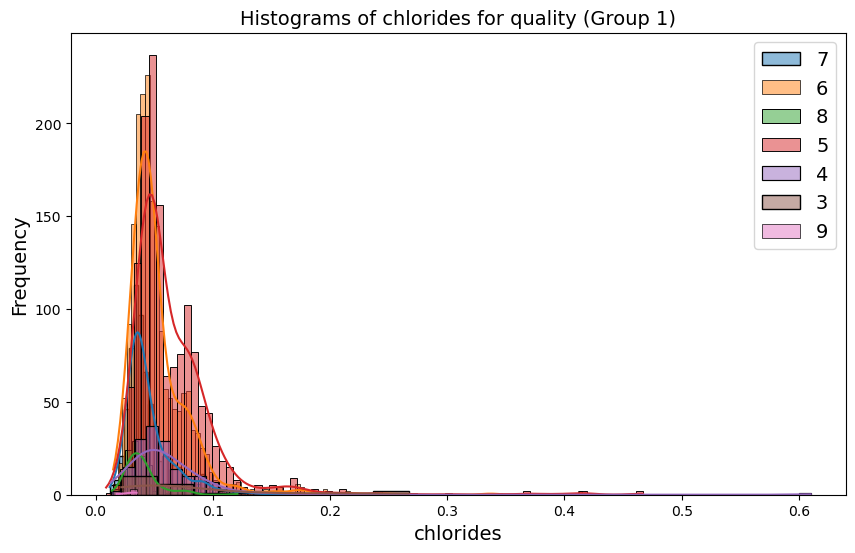

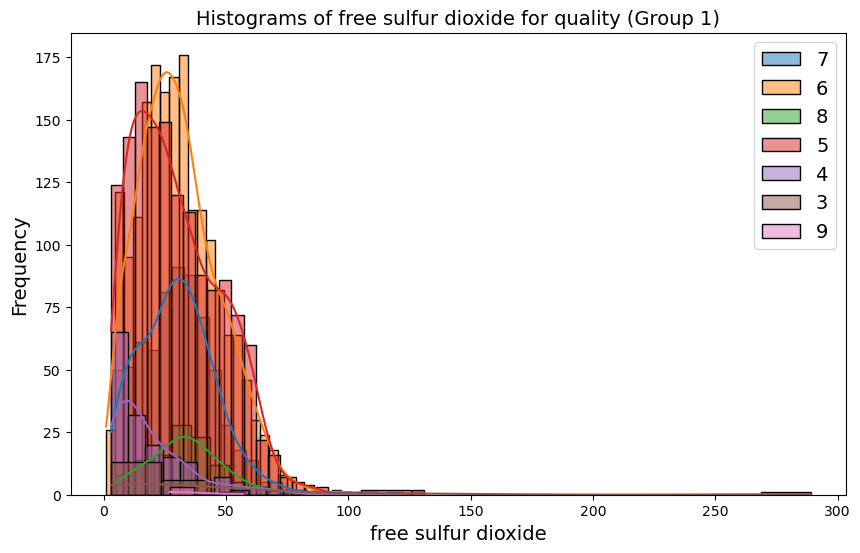

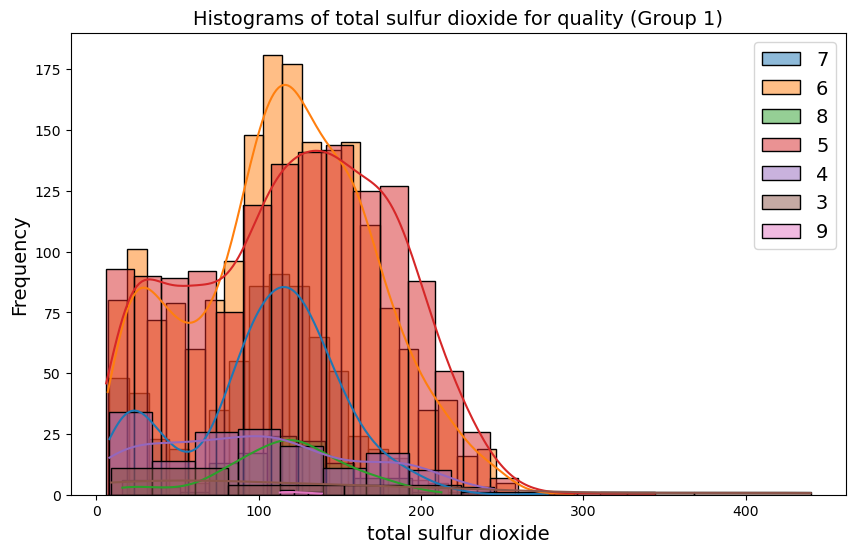

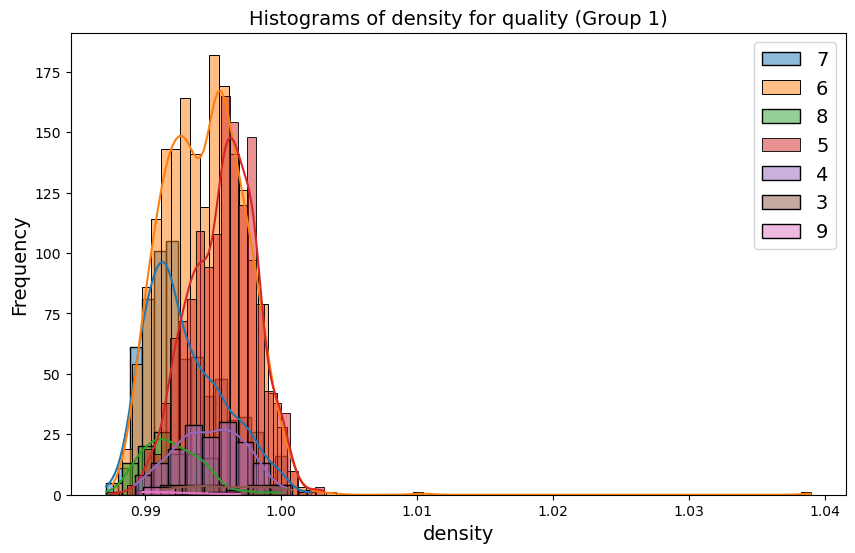

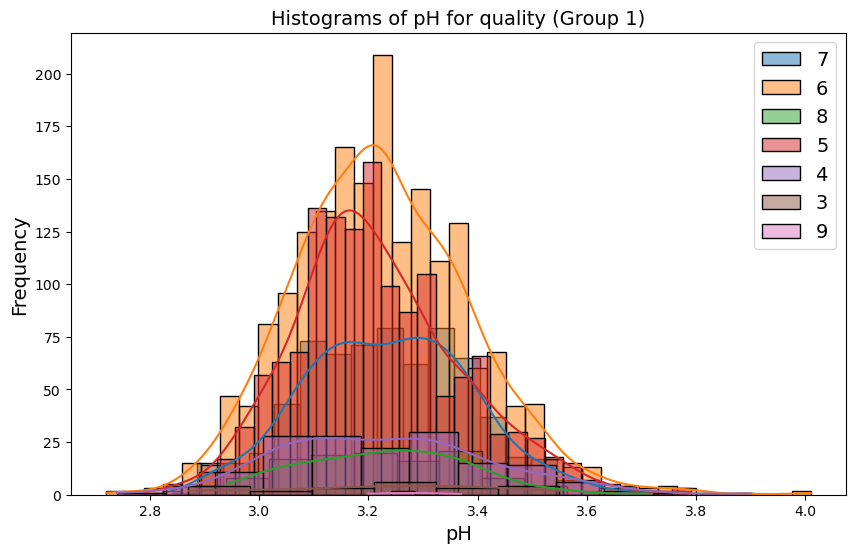

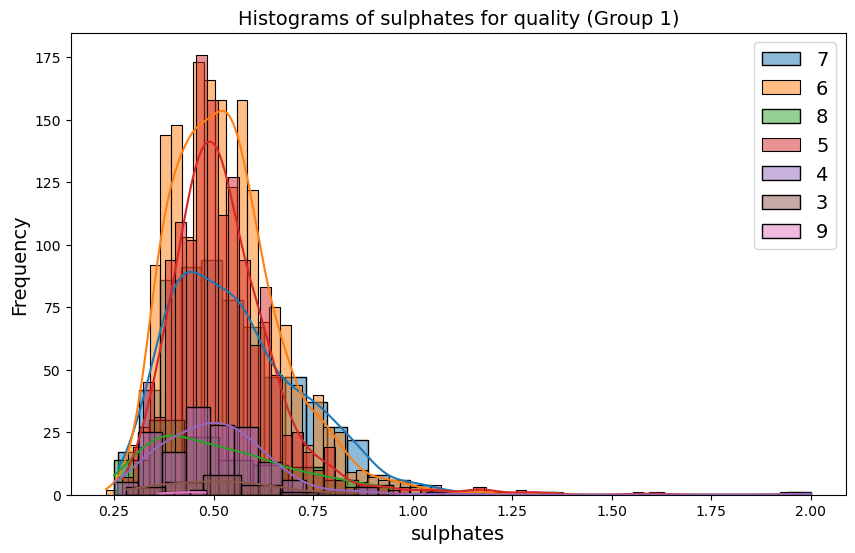

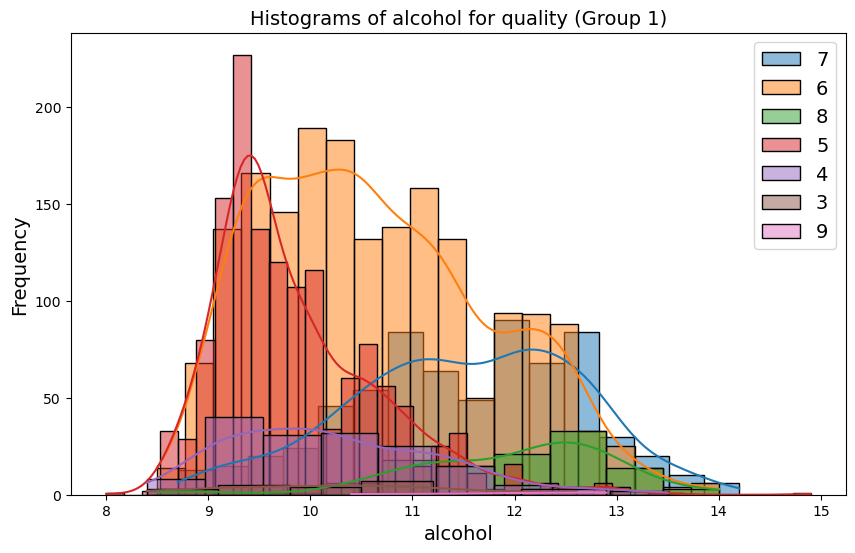

In [24]:
for col in features_num:
    plot_grouped_histograms(train_set,'quality',col,7)

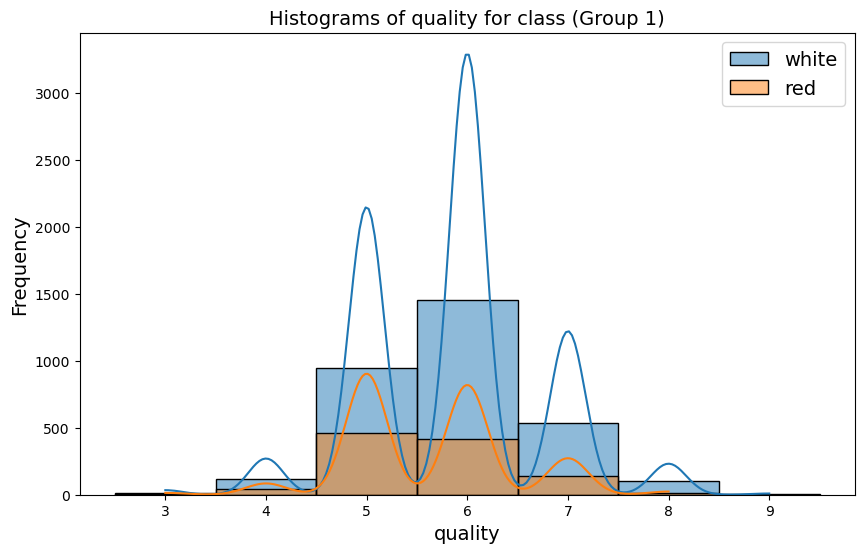

In [25]:
plot_grouped_histograms(train_set,'class', 'quality',2)

### Bivariable Regresión
Target = 'alcohol'

In [26]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix.round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.26,0.31,-0.10
volatile acidity,0.22,1.00,-0.39,-0.17,0.38,-0.36,-0.41,0.30,0.24,0.22,-0.06
citric acid,0.32,-0.39,1.00,0.14,0.06,0.15,0.21,0.09,-0.34,0.06,-0.01
residual sugar,-0.11,-0.17,0.14,1.00,-0.13,0.39,0.48,0.53,-0.23,-0.17,-0.30
chlorides,0.30,0.38,0.06,-0.13,1.00,-0.19,-0.28,0.37,0.03,0.40,-0.27
free sulfur dioxide,-0.28,-0.36,0.15,0.39,-0.19,1.00,0.71,0.00,-0.15,-0.20,-0.17
total sulfur dioxide,-0.33,-0.41,0.21,0.48,-0.28,0.71,1.00,0.01,-0.24,-0.28,-0.25
density,0.46,0.30,0.09,0.53,0.37,0.00,0.01,1.00,0.05,0.27,-0.66
pH,-0.26,0.24,-0.34,-0.23,0.03,-0.15,-0.24,0.05,1.00,0.16,0.09
sulphates,0.31,0.22,0.06,-0.17,0.40,-0.20,-0.28,0.27,0.16,1.00,-0.01


In [27]:
abs(corr_matrix['alcohol']).sort_values(ascending = False).round(2)

alcohol                 1.00
density                 0.66
residual sugar          0.30
chlorides               0.27
total sulfur dioxide    0.25
free sulfur dioxide     0.17
fixed acidity           0.10
pH                      0.09
volatile acidity        0.06
citric acid             0.01
sulphates               0.01
Name: alcohol, dtype: float64

In [28]:
target = 'alcohol'
low_corr_vars = corr_matrix[target][(abs(corr_matrix[target]) < 0.2)].index.tolist()
low_corr_vars


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'free sulfur dioxide',
 'pH',
 'sulphates']

In [29]:

high_corr_vars = corr_matrix[target][(abs(corr_matrix[target]) >= 0.2)].index.tolist()
high_corr_vars

['residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']

Matriz de correlación con la variable target:
alcohol                 1.000000
density                 0.663937
residual sugar          0.301145
chlorides               0.274187
total sulfur dioxide    0.251192
free sulfur dioxide     0.169361
fixed acidity           0.095123
pH                      0.087151
volatile acidity        0.064315
citric acid             0.007855
sulphates               0.007179
Name: alcohol, dtype: float64



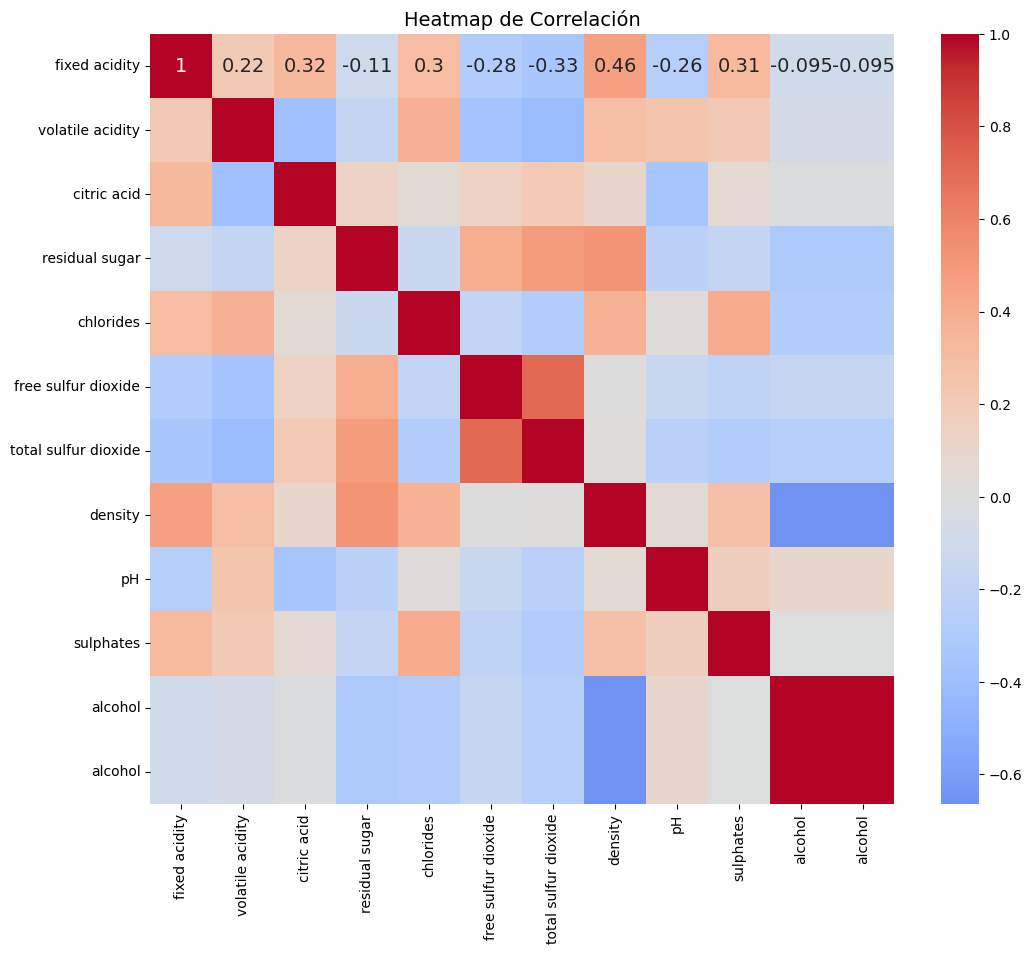

Variables con correlación por debajo del 20%: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'alcohol']
Variables con correlación por encima del 20%: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'alcohol']

Prueba de correlación para fixed acidity vs alcohol
****************************************
Prueba de correlación (Pearson):
Estadístico de correlación: -0.10
p-valor: 0.000
La variable fixed acidity no está significativamente asociada con alcohol (p >= 0.05 o correlación < 0.2).

Prueba de correlación para volatile acidity vs alcohol
****************************************
Prueba de correlación (Pearson):
Estadístico de correlación: -0.06
p-valor: 0.000
La variable volatile acidity no está significativamente asociada con alcohol (p 

In [30]:
analisis_bivariable_numericas_numerica(train_set,'alcohol',features_num)

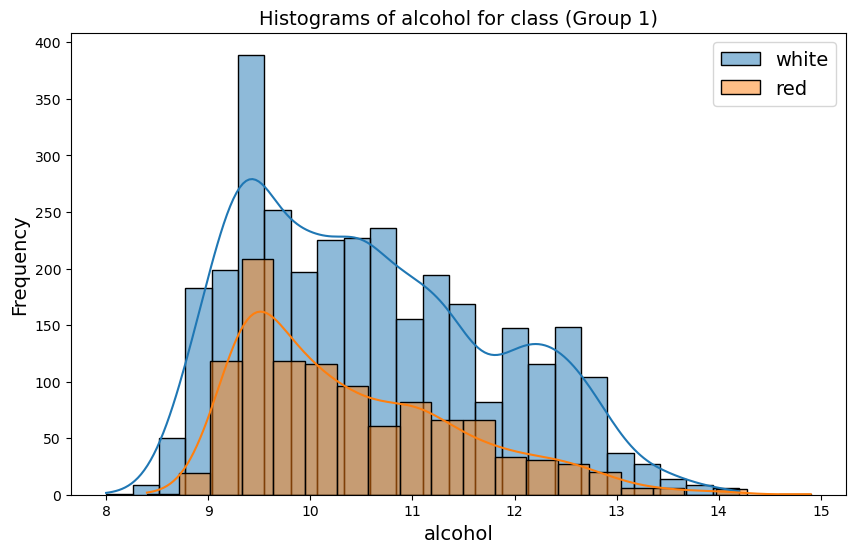

In [31]:
plot_grouped_histograms(train_set,'class','alcohol',9)

In [32]:
train_set.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'class']

In [33]:
# Features modelo de clasificación
features_num_cla = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                    'density', 'sulphates', 'alcohol']
features_cat_cla = ['class']
target_cla = 'quality'

In [34]:
# Features modelo de regresión
features_num_reg = ['residual sugar', 'chlorides', 'total sulfur dioxide', 'density']
features_cat_reg = ['quality','class']
target_reg = 'alcohol'

## Tratamiento de Features

### Para el modelo de clasificación

In [35]:
train_set_cla = train_set.copy()
test_set_cla = test_set.copy()
train_set_reg = train_set.copy()
test_set_reg = test_set.copy()

In [36]:
# Para el modelo de clasificación
# Tratamientos variables numéricas con heavy_tail (todas menos alcohol)
features_cat_cla_log = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                    'density', 'sulphates']

scaler = StandardScaler()

# Hago también el test ya
for col in features_cat_cla_log:
    # Transformación logarítmica
    train_set_cla[f'log_{col}'] = train_set_cla[col].apply(lambda x: x if x > 0 else 1e-5)
    test_set_cla[f'log_{col}'] = test_set_cla[col].apply(lambda x: x if x > 0 else 1e-5)

    # Escalo los datos
    train_set_cla[f'log_{col}'] = scaler.fit_transform(train_set_cla[[f'log_{col}']])
    test_set_cla[f'log_{col}'] = scaler.transform(test_set_cla[[f'log_{col}']])

train_set_cla['alcohol'] = scaler.fit_transform(train_set_cla[['alcohol']])
test_set_cla['alcohol']  = scaler.transform(test_set_cla[['alcohol']])    



In [37]:
# Aplico un One-Hot Econding a la variable categórica 'class' (también lo hago ya para test)
train_set_cla = pd.get_dummies(train_set_cla, columns=['class'], dtype=int)
test_set_cla= pd.get_dummies(test_set_cla, columns=['class'], dtype=int)

### Para el modelo de regresión

In [38]:
# Para el modelo de regresión
# Tratamientos variables numéricas con heavy_tail (todas menos alcohol)
features_num_reg_log = ['residual sugar', 'chlorides', 'total sulfur dioxide', 'density']

scaler = StandardScaler()

# Hago también el test ya
for col in features_num_reg_log:
    # Transformación logarítmica
    train_set_reg[f'log_{col}'] = train_set_reg[col].apply(lambda x: x if x > 0 else 1e-5)
    test_set_reg[f'log_{col}'] = test_set_reg[col].apply(lambda x: x if x > 0 else 1e-5)

    # Escalo los datos
    train_set_reg[f'log_{col}'] = scaler.fit_transform(train_set_reg[[f'log_{col}']])
    test_set_reg[f'log_{col}'] = scaler.transform(test_set_reg[[f'log_{col}']])



In [39]:
for col in features_cat_reg:
    train_set_reg = pd.get_dummies(train_set_reg, columns=[col], dtype=int)
    test_set_reg= pd.get_dummies(test_set_reg, columns=[col], dtype=int)

# #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [40]:
train_set_cla.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'log_fixed acidity',
       'log_volatile acidity', 'log_citric acid', 'log_residual sugar',
       'log_chlorides', 'log_free sulfur dioxide', 'log_total sulfur dioxide',
       'log_density', 'log_sulphates', 'class_red', 'class_white'],
      dtype='object')

## X,y de train y test

In [41]:
columnas_eliminar = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'quality']

X_train_cla = train_set_cla.drop(columns=columnas_eliminar)
y_train_cla = train_set_cla['quality']
X_test_cla = test_set_cla.drop(columns=columnas_eliminar)
y_test_cla = test_set_cla['quality']

In [42]:
X_train_cla.columns

Index(['alcohol', 'log_fixed acidity', 'log_volatile acidity',
       'log_citric acid', 'log_residual sugar', 'log_chlorides',
       'log_free sulfur dioxide', 'log_total sulfur dioxide', 'log_density',
       'log_sulphates', 'class_red', 'class_white'],
      dtype='object')

## Modelos

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
reg_log = LogisticRegression(max_iter=10000, random_state=42)
rf_cla = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=42)
cat = CatBoostClassifier(random_state=42, verbose=False)

In [44]:
knn.fit(X_train_cla,y_train_cla)

KNeighborsClassifier()

In [45]:
from sklearn.metrics import recall_score, balanced_accuracy_score
y_predict_knn = knn.predict(X_train_cla)

macro_recall = recall_score(y_train_cla,y_predict_knn, average='macro')
micro_recall = recall_score(y_train_cla,y_predict_knn, average='micro')
balanced_acc = balanced_accuracy_score(y_train_cla,y_predict_knn)

print(f'Macro Average Recall: {macro_recall:.3f}')
print(f'Micro Average Recall: {micro_recall:.3f}')
print(f'Balanced Accuracy: {balanced_acc:.3f}')

Macro Average Recall: 0.365
Micro Average Recall: 0.663
Balanced Accuracy: 0.365


In [46]:
y_predict_knn = knn.predict(X_train_cla)
print(classification_report(y_train_cla,y_predict_knn))

              precision    recall  f1-score   support

           3       0.43      0.14      0.21        22
           4       0.57      0.33      0.42       162
           5       0.67      0.74      0.70      1407
           6       0.66      0.73      0.70      1870
           7       0.66      0.49      0.56       677
           8       0.62      0.11      0.19       114
           9       0.00      0.00      0.00         4

    accuracy                           0.66      4256
   macro avg       0.52      0.36      0.40      4256
weighted avg       0.66      0.66      0.65      4256



### Optimización knn

In [47]:
recall_opt = []
macro_recall_opt = []
micro_recall_opt = []



for k in range (1,21):
    knn_opt = KNeighborsClassifier(n_neighbors=k)
    scores_recall = cross_val_score(knn_opt,X_train_cla, y_train_cla, cv=5, scoring='recall')
    scores_macro = cross_val_score(knn_opt,X_train_cla, y_train_cla, cv=5, scoring='recall_macro')
    scores_micro = cross_val_score(knn_opt,X_train_cla, y_train_cla, cv=5, scoring='recall_micro')

    avg_recall = np.mean(scores_recall)
    avg_macro_recall = np.mean(scores_macro)
    avg_micro_recall = np.mean(scores_micro)

    recall_opt.append(avg_recall)
    macro_recall_opt.append(avg_macro_recall)
    micro_recall_opt.append(avg_micro_recall)

best_k_recall = np.argmax(recall_opt)+1
best_k_macro = np.argmax(macro_recall_opt)+1
best_k_micro = np.argmax(micro_recall_opt)+1

print(f'El mejor k para recall es {best_k_recall:.2f}')
print()
print(f'El mejor k para macro es {best_k_macro:.2f}')
print()
print(f'El mejor k para micro es {best_k_micro:.2f}')
print()

El mejor k para recall es 1.00

El mejor k para macro es 3.00

El mejor k para micro es 20.00



### Comparación modelos

In [48]:
# Definir los nombres de los modelos y los modelos correspondientes
model_names = ['KNN', 'Regresión Logística', 'Random Forest', 'CatBoost']
model_set = [knn, reg_log, rf_cla, cat]

# Crear un diccionario para almacenar las métricas de validación cruzada
metricas_cv = {}

# Lista para almacenar los valores de recall
valores = []

# Realizar validación cruzada para cada modelo
for nombre, modelo in zip(model_names, model_set):
    # Calcular las métricas de validación cruzada
    scores = cross_val_score(modelo, X_train_cla, y_train_cla, cv=5, scoring='recall')
    
    # Almacenar el resultado
    metricas_cv[nombre] = scores
    valores.append(np.mean(scores))

# Encontrar el modelo con la mayor métrica de recall
ganador = list(metricas_cv.keys())[np.argmax(valores)]

# Imprimir los resultados
print("Resultados de la validación cruzada:")
for nombre, scores in metricas_cv.items():
    print(f"{nombre}: Recall = {np.mean(scores):.3f}")
print('*'*25)
print(f"\nEl ganador es: {ganador}")

Resultados de la validación cruzada:
KNN: Recall = nan
Regresión Logística: Recall = nan
Random Forest: Recall = nan
CatBoost: Recall = nan
*************************

El ganador es: KNN


### Prueba regresión Logística

Entrenamiento del modelo

In [49]:
# Como no me sale bien el comparativo entre modelos hago el de la regresión logística
reg_log.fit(X_train_cla,y_train_cla)

LogisticRegression(max_iter=10000, random_state=42)

Predicción contra Train

In [50]:
y_predict_reg_log = reg_log.predict(X_train_cla)
print(classification_report(y_train_cla,y_predict_reg_log))


              precision    recall  f1-score   support

           3       0.50      0.05      0.08        22
           4       0.57      0.05      0.09       162
           5       0.61      0.61      0.61      1407
           6       0.53      0.71      0.61      1870
           7       0.48      0.23      0.31       677
           8       0.00      0.00      0.00       114
           9       0.00      0.00      0.00         4

    accuracy                           0.55      4256
   macro avg       0.38      0.24      0.24      4256
weighted avg       0.53      0.55      0.52      4256



### Optimización hiperparámetros

In [51]:
params_grid = {
    'penalty':['l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight':['balanced']
}

reg_log_grid = RandomizedSearchCV(
    estimator=reg_log,
    param_distributions=params_grid,
    cv=5,
    scoring='recall'
)

reg_log_grid.fit(X_train_cla,y_train_cla)


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=10000,
                                                random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': ['balanced'],
                                        'penalty': ['l2']},
                   scoring='recall')

In [74]:
y_predict_reg_log_grid = reg_log_grid.predict(X_train_cla)
print(classification_report(y_train_cla,y_predict_reg_log_grid))

              precision    recall  f1-score   support

           3       0.03      0.59      0.05        22
           4       0.11      0.47      0.18       162
           5       0.50      0.40      0.45      1407
           6       0.60      0.13      0.21      1870
           7       0.32      0.22      0.27       677
           8       0.07      0.35      0.12       114
           9       0.01      1.00      0.01         4

    accuracy                           0.26      4256
   macro avg       0.23      0.45      0.18      4256
weighted avg       0.49      0.26      0.29      4256



### Evaluación del modelo contra test

In [75]:
y_predict_reg_log_grid = reg_log_grid.predict(X_test_cla)
print(classification_report(y_test_cla,y_predict_reg_log_grid))

              precision    recall  f1-score   support

           3       0.01      0.12      0.01         8
           4       0.11      0.43      0.18        44
           5       0.49      0.35      0.41       345
           6       0.48      0.11      0.18       453
           7       0.25      0.17      0.20       179
           8       0.10      0.44      0.17        34
           9       0.00      0.00      0.00         1

    accuracy                           0.22      1064
   macro avg       0.21      0.23      0.16      1064
weighted avg       0.41      0.22      0.25      1064



In [53]:
print('Parametros:', reg_log_grid.best_params_)
print('Best_Score', reg_log_grid.best_score_)

Parametros: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.001}
Best_Score nan


### Análisis de errores

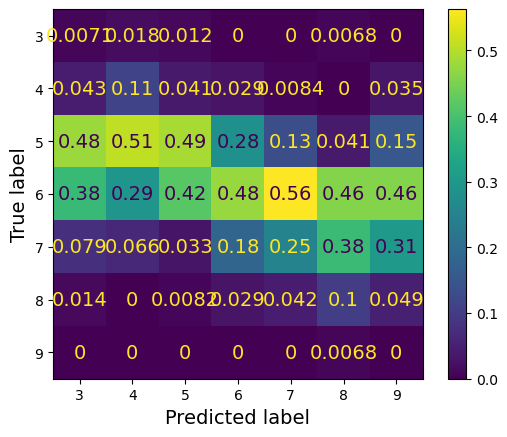

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test_cla,
                                        y_predict_reg_log_grid,normalize='pred')

### Equilibrado

In [79]:
smote = SMOTE(k_neighbors=3,random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_cla,y_train_cla)
y_train_smote.value_counts()

quality
3    1870
4    1870
5    1870
6    1870
7    1870
8    1870
9    1870
Name: count, dtype: int64

In [80]:
# REgresión logística sin optimizar
reg_log_smote = reg_log.fit(X_train_smote,y_train_smote)

y_predict = reg_log_smote.predict(X_test_cla)
print(classification_report(y_test_cla,y_predict))

              precision    recall  f1-score   support

           3       0.01      0.12      0.02         8
           4       0.13      0.36      0.19        44
           5       0.56      0.44      0.49       345
           6       0.52      0.25      0.34       453
           7       0.27      0.23      0.25       179
           8       0.11      0.47      0.18        34
           9       0.00      0.00      0.00         1

    accuracy                           0.32      1064
   macro avg       0.23      0.27      0.21      1064
weighted avg       0.46      0.32      0.36      1064



In [81]:
# REgresión logística optimizada
reg_log_smote = reg_log_grid.fit(X_train_smote,y_train_smote)

y_predict = reg_log_smote.predict(X_test_cla)
print(classification_report(y_test_cla,y_predict))

              precision    recall  f1-score   support

           3       0.01      0.12      0.02         8
           4       0.12      0.45      0.19        44
           5       0.52      0.41      0.46       345
           6       0.56      0.14      0.23       453
           7       0.24      0.18      0.20       179
           8       0.12      0.47      0.19        34
           9       0.00      0.00      0.00         1

    accuracy                           0.26      1064
   macro avg       0.22      0.25      0.18      1064
weighted avg       0.46      0.26      0.29      1064



# #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [55]:
train_set_reg.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'log_residual sugar', 'log_chlorides',
       'log_total sulfur dioxide', 'log_density', 'quality_3', 'quality_4',
       'quality_5', 'quality_6', 'quality_7', 'quality_8', 'quality_9',
       'class_red', 'class_white'],
      dtype='object')

## X,y de train y test

In [56]:
columnas_eliminar_reg = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

X_train_reg = train_set_reg.drop(columns=columnas_eliminar_reg)
y_train_reg = train_set_reg['alcohol']
X_test_reg = test_set_reg.drop(columns=columnas_eliminar_reg)
y_test_reg = test_set_reg['alcohol']

In [57]:
X_train_reg.columns

Index(['log_residual sugar', 'log_chlorides', 'log_total sulfur dioxide',
       'log_density', 'quality_3', 'quality_4', 'quality_5', 'quality_6',
       'quality_7', 'quality_8', 'quality_9', 'class_red', 'class_white'],
      dtype='object')

## Modelos

In [58]:
reg_ln = LinearRegression()
rf = RandomForestRegressor(max_depth=4,random_state=42)
xgb = XGBRFRegressor(max_depth = 4, random_state = 42)

## Comparación de modelos

In [59]:
model_names = ['LinearRegression', 'RandomForestRegressor', 'XGBoost']
model_set = [reg_ln, rf, xgb]

# Crear un diccionario para almacenar las métricas de validación cruzada
metricas_cv = {}

# Lista para almacenar los valores 
valores = []

# Realizar validación cruzada para cada modelo
for nombre, modelo in zip(model_names, model_set):
    # Calcular las métricas de validación cruzada 
    scores = cross_val_score(modelo, X_train_reg, y_train_reg, cv=5, scoring='neg_root_mean_squared_error')
        
    # Almacenar el resultado
    metricas_cv[nombre] = -scores
    valores.append(np.mean(scores))

# Encontrar el modelo con la mayor métrica
ganador = model_names[np.argmax(valores)]  # Usamos model_names para identificar el modelo ganador

# Imprimir los resultados
print("Resultados de la validación cruzada:")
for nombre, scores in metricas_cv.items():
    # Convertir neg_root_mean_squared_error a RMSE positivo
    rmse_scores = np.sqrt(scores)
    print(f"{nombre}: RMSE = {np.mean(rmse_scores):.3f}")
print('*'*25)
print(f"\nEl ganador es: {ganador}")

Resultados de la validación cruzada:
LinearRegression: RMSE = 0.828
RandomForestRegressor: RMSE = 0.813
XGBoost: RMSE = 0.818
*************************

El ganador es: RandomForestRegressor


### Modelo contra Train

In [60]:
rf.fit(X_train_reg,y_train_reg)

RandomForestRegressor(max_depth=4, random_state=42)

In [68]:
y_predict_rf = rf.predict(X_train_reg)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train_reg,y_predict_rf))
print(f'RMSE_train: {RMSE_train}')

RMSE_train: 0.6427411442497588


### Features importance

In [62]:
feature_importance = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Features' : X_train_reg.columns,
    'Importance': feature_importance
})

feature_importance_df=feature_importance_df.sort_values('Importance',ascending=False)

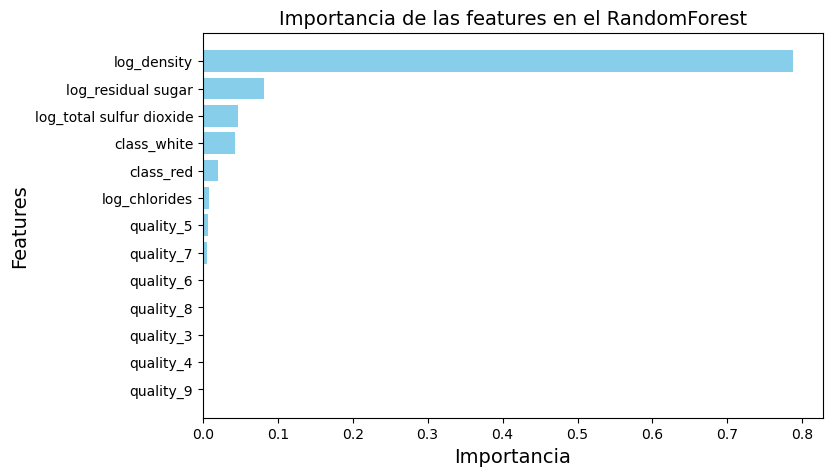

In [76]:
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia de las features en el RandomForest')
plt.gca().invert_yaxis()
plt.show()

### Optimización hiperparámetros

In [70]:
rf_opt = RandomForestRegressor(random_state=42)

params_grid = {
    "n_estimators": [100, 200],
    "max_depth": [4, 8, 16],
    "max_features": ["sqrt", "log2", None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [10, 20, 40]
}

rf_grid = RandomizedSearchCV(rf_opt, 
                             param_distributions=params_grid,
                             n_iter=100,  
                             cv=5,  
                             scoring='neg_mean_squared_error',  
                             n_jobs=-1   
                            )

rf_grid.fit(X_train_reg,y_train_reg)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 16],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [10, 20, 40],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_squared_error')

In [71]:
y_predict_rf_opt = rf_grid.predict(X_train_reg)
mse = mean_squared_error(y_train_reg, y_predict_rf_opt)
print("Mean Squared Error (MSE) en el conjunto de entrenamiento:", mse)

Mean Squared Error (MSE) en el conjunto de entrenamiento: 0.22129919584757946


### Evaluación contra Test

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
y_predict_rf_opt = rf_grid.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_predict_rf_opt)
r2 = r2_score(y_test_reg, y_predict_rf_opt)
print("Mean Squared Error (MSE) en el conjunto de entrenamiento:", mse)
print("R^2 Score en el conjunto de entrenamiento:", r2)

Mean Squared Error (MSE) en el conjunto de entrenamiento: 0.32769903072395806
R^2 Score en el conjunto de entrenamiento: 0.7642153694784294


### Análisis de errores

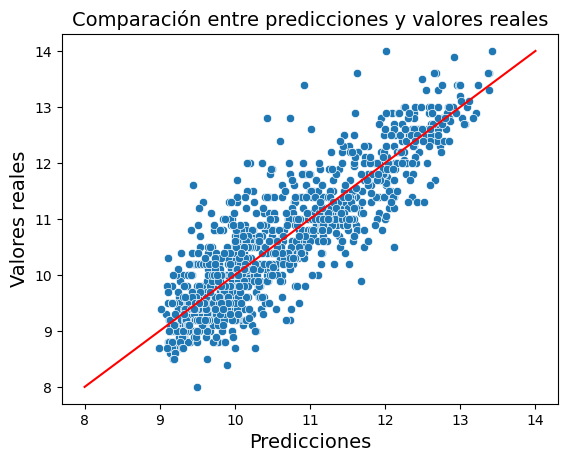

In [73]:
sns.scatterplot(x=y_predict_rf_opt,y=y_test_reg);

plt.plot([y_test_reg.min(),y_test_reg.max()],[y_test_reg.min(),y_test_reg.max()],'red')

# Etiquetas y título
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Comparación entre predicciones y valores reales')

# Mostrar el gráfico
plt.show()